# Projeto Indicium - Lighthouse

Candidato: Renato Massamitsu Zama Inomata

## Introdução

Contextualizar problema

Começaremos importando os pacotes e dados.

In [793]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

df = pd.read_csv('./dataset/cars_train.csv', sep='\t', encoding='utf_16')

Visualizando os dados:

In [794]:
display(df.head(5))
print(f'Tamanho do dataset: {df.shape}')

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,Sedã,N,Branco,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.590084
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,Sedã,N,Branco,PF,Belo Horizonte,Minas Gerais (MG),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.332634
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.0,44070.0,Automática,4,Sedã,N,Preto,PJ,Santos,São Paulo (SP),Loja,True,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.814472
3,56862509826849933428086372390159405545,14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.0,85357.0,Automática,4,Picape,N,Branco,PJ,Sorocaba,São Paulo (SP),Loja,True,True,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.358857
4,338980975753200343894519909855598027197,8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.0,71491.0,Automática,4,Utilitário esportivo,N,Preto,PF,Rio de Janeiro,Rio de Janeiro (RJ),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.763891


Tamanho do dataset: (29584, 29)


In [795]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

In [796]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_fotos,29407.0,10.323834,3.487334,8.000000,8.000000,8.000000,14.000000,2.100000e+01
ano_de_fabricacao,29584.0,2016.758552,4.062422,1985.000000,2015.000000,2018.000000,2019.000000,2.022000e+03
ano_modelo,29584.0,2017.808985,2.673930,1997.000000,2016.000000,2018.000000,2020.000000,2.023000e+03
hodometro,29584.0,58430.592077,32561.769309,100.000000,31214.000000,57434.000000,81953.500000,3.900650e+05
num_portas,29584.0,3.940677,0.338360,2.000000,4.000000,4.000000,4.000000,4.000000e+00
veiculo_alienado,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
preco,29584.0,133023.879880,81662.872247,9869.950645,76571.768462,114355.796998,163679.617425,1.359813e+06


In [797]:
# Verificando se há ids duplicados
df.id.duplicated().sum()

0

## Análise das features

A seguir, vamos verificar como estão distribuídas as observações de cada uma das features.

### num_fotos

In [798]:
# Funções auxiliares

# Pintar de laranja os maiores valores
def highlight_max(element):
    is_max = (element == element.max())
    return ['background: darkorange' if cell == True else '' for cell in is_max]

# Pintar de azul os menores valores
def highlight_min(element):
    is_min = (element == element.min())
    return ['background: royalblue' if cell == True else '' for cell in is_min]

# Agrega o preço pela feature especificada, apresenta algumas estatísticas da feature
def agg_preco(data, feature):    
    agg_df = data.groupby(feature).agg({'preco': ['count', 'sum', 'mean', 'std', 'min', 'max']}) \
        .preco.sort_values('sum', ascending=False).round(2) \
        .style.apply(highlight_max).apply(highlight_min)
    return agg_df 

In [799]:
# num_fotos
print(f'Quantidade de nulos em `num_fotos`: {df.num_fotos.isna().sum()} ({df.num_fotos.isna().sum()/df.shape[0] * 100:.2f}%)')
# Verificando a distribuição de número de fotos
display(
    df.num_fotos.value_counts() \
        .reset_index().sort_values('index') \
        .rename(columns={'index':'num_fotos', 'num_fotos':'quantidade'}).set_index('num_fotos').T
)

Quantidade de nulos em `num_fotos`: 177 (0.60%)


num_fotos,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
quantidade,19420,728,3,21,147,717,1811,2764,2227,985,248,45,286,5


Vamos preencher os valores nulos com zeros e aproveitaremos também para trocar o tipo de `float` para `int`.

In [800]:
df['num_fotos'] = df.num_fotos.fillna(0).astype(int)

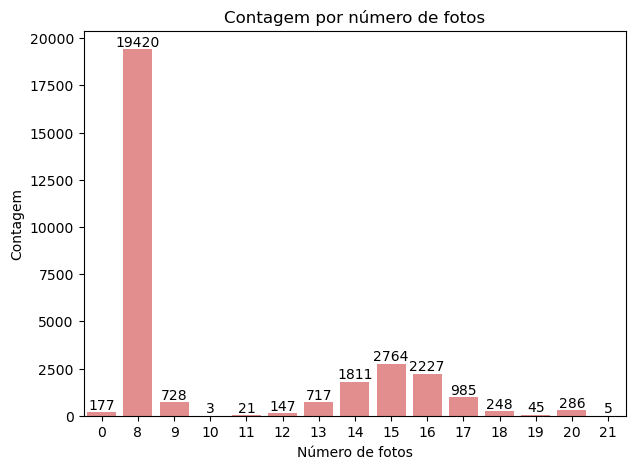

In [801]:
# Plotagem do gráfico
plt.figure(figsize=(7, 5))
ax = sns.countplot(df.sort_values('num_fotos'), x='num_fotos', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.ylabel('Contagem')
plt.xlabel('Número de fotos')
plt.title('Contagem por número de fotos')
plt.show()

In [802]:
agg_preco(df, 'num_fotos')


,count,sum,mean,std,min,max
num_fotos,,,,,,
8,19420,2642130265.090000,136052.020000,82100.750000,9869.950000,1154360.170000
15,2764,349779964.090000,126548.470000,83706.720000,13642.890000,1140112.650000
16,2227,284835737.390000,127901.090000,80310.090000,16264.970000,676234.220000
14,1811,225125529.490000,124310.070000,73021.060000,14011.650000,552000.550000
17,985,130169389.170000,132151.660000,92001.800000,16283.020000,1349747.710000
9,728,88645891.870000,121766.330000,38856.440000,29608.910000,317452.090000
13,717,86682623.760000,120896.270000,93676.560000,21656.420000,1359812.890000
20,286,48546249.770000,169742.130000,106116.040000,29328.120000,660950.460000
18,248,31472121.620000,126903.720000,82111.270000,21608.710000,642644.310000


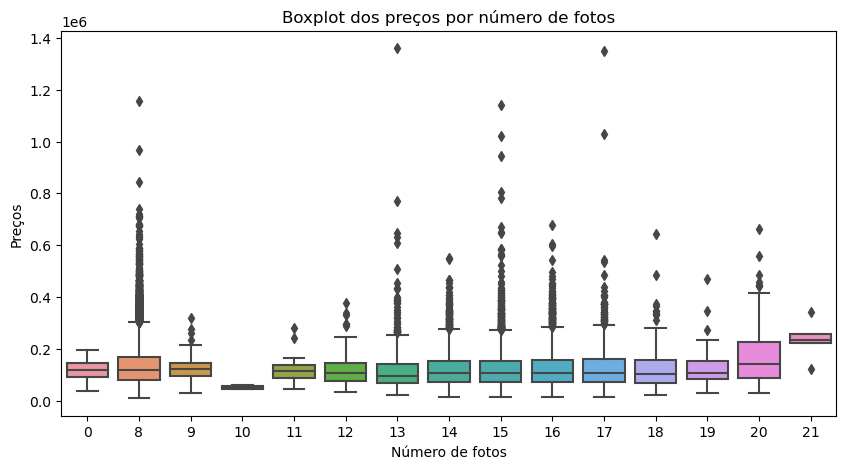

In [803]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(df,
    x='num_fotos', y='preco')
plt.xlabel('Número de fotos')
plt.ylabel('Preços')
plt.title('Boxplot dos preços por número de fotos')
plt.show()

### marca, modelo e versao

Vamos realizar uma contagem de veículos vendidos por marca.

In [804]:
# Verificando a quantidade de veículos por marca em uma data frame horizontal
print('Quantidade de veículos vendidos por marca')
display(df.marca.value_counts().to_frame().T.rename(index={'marca': 'quantidade'}))

Quantidade de veículos vendidos por marca


,VOLKSWAGEN,CHEVROLET,TOYOTA,HYUNDAI,JEEP,FIAT,BMW,AUDI,PEUGEOT,HONDA,MERCEDES-BENZ,FORD,MITSUBISHI,LAND ROVER,RENAULT,NISSAN,KIA,PORSCHE,VOLVO,CITROËN,TROLLER,RAM,CHERY,JAGUAR,MINI,LEXUS,SUZUKI,SUBARU,DODGE,CHRYSLER,SSANGYONG,SMART,ALFA ROMEO,LIFAN,MASERATI,JAC,IVECO,EFFA,FERRARI,BRM
quantidade,4594,3020,2180,2043,2000,1918,1784,1698,1675,1586,1125,1060,862,760,538,438,408,349,287,194,177,168,153,148,137,75,41,41,37,30,14,12,9,8,7,3,2,1,1,1


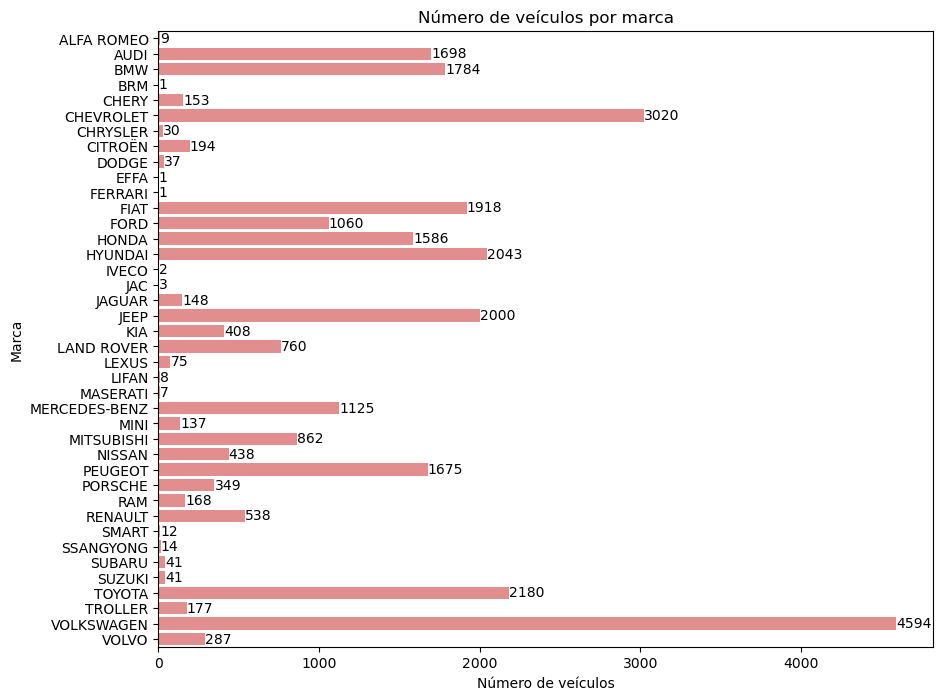

In [805]:
# Plotagem do gráfico
plt.figure(figsize=(10, 8))
ax = sns.countplot(df.sort_values('marca'), y='marca', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.xlabel('Número de veículos')
plt.ylabel('Marca')
plt.title('Número de veículos por marca')
plt.show()

In [806]:
print('Top 10 modelos mais vendidos')

display(
    df[['marca', 'modelo']].value_counts().to_frame().rename(columns={0: 'quantidade'}).head(10)
)

Top 10 modelos mais vendidos


quantidade
marca      modelo             
JEEP       COMPASS        1480
PEUGEOT    2008           1431
AUDI       Q3              914
FIAT       TORO            902
TOYOTA     COROLLA         867
CHEVROLET  ONIX            855
BMW        320i            822
VOLKSWAGEN AMAROK          725
           GOLF            697
TOYOTA     HILUX           648

In [807]:
print('Top 10 marcas com mais modelos diferentes de carros')

display(
    df.groupby(['marca']).modelo.nunique().sort_values(ascending=False).to_frame().head(10)
)

Top 10 marcas com mais modelos diferentes de carros


,modelo
marca,
MERCEDES-BENZ,74
BMW,50
CHEVROLET,29
VOLKSWAGEN,27
AUDI,24
FIAT,21
HYUNDAI,17
MITSUBISHI,16
FORD,16


In [808]:
print('Top 10 modelos com mais versões diferentes')

display(
    df.groupby(['marca', 'modelo']).versao.nunique().sort_values(ascending=False).to_frame().head(10)
)

Top 10 modelos com mais versões diferentes


versao
marca      modelo          
FORD       ECOSPORT      29
RENAULT    SANDERO       27
HYUNDAI    HB20          26
CHEVROLET  ONIX          25
           S10           25
HONDA      CIVIC         24
AUDI       A3            22
FORD       RANGER        22
VOLKSWAGEN FOX           22
FORD       FIESTA        21

Analisando as marcas, modelos e versões com relação ao preço:

In [809]:
# Marca
agg_preco(df, 'marca')

,count,sum,mean,std,min,max
marca,,,,,,
VOLKSWAGEN,4594,541816761.430000,117940.090000,64307.660000,9869.950000,771701.880000
BMW,1784,357694116.720000,200501.190000,93841.350000,32086.060000,1019840.610000
TOYOTA,2180,340505449.110000,156195.160000,89191.350000,18528.460000,781750.380000
CHEVROLET,3020,281426805.570000,93187.680000,48755.520000,16264.970000,674366.330000
JEEP,2000,276734332.000000,138367.170000,48603.310000,31229.670000,412803.030000
AUDI,1698,271642220.080000,159977.750000,75142.240000,22140.450000,672933.090000
PEUGEOT,1675,205686373.770000,122797.840000,36905.170000,11606.400000,238684.790000
MERCEDES-BENZ,1125,198979624.010000,176870.780000,96623.240000,27882.010000,712798.860000
FIAT,1918,191246013.670000,99711.160000,46443.020000,13642.890000,332809.780000


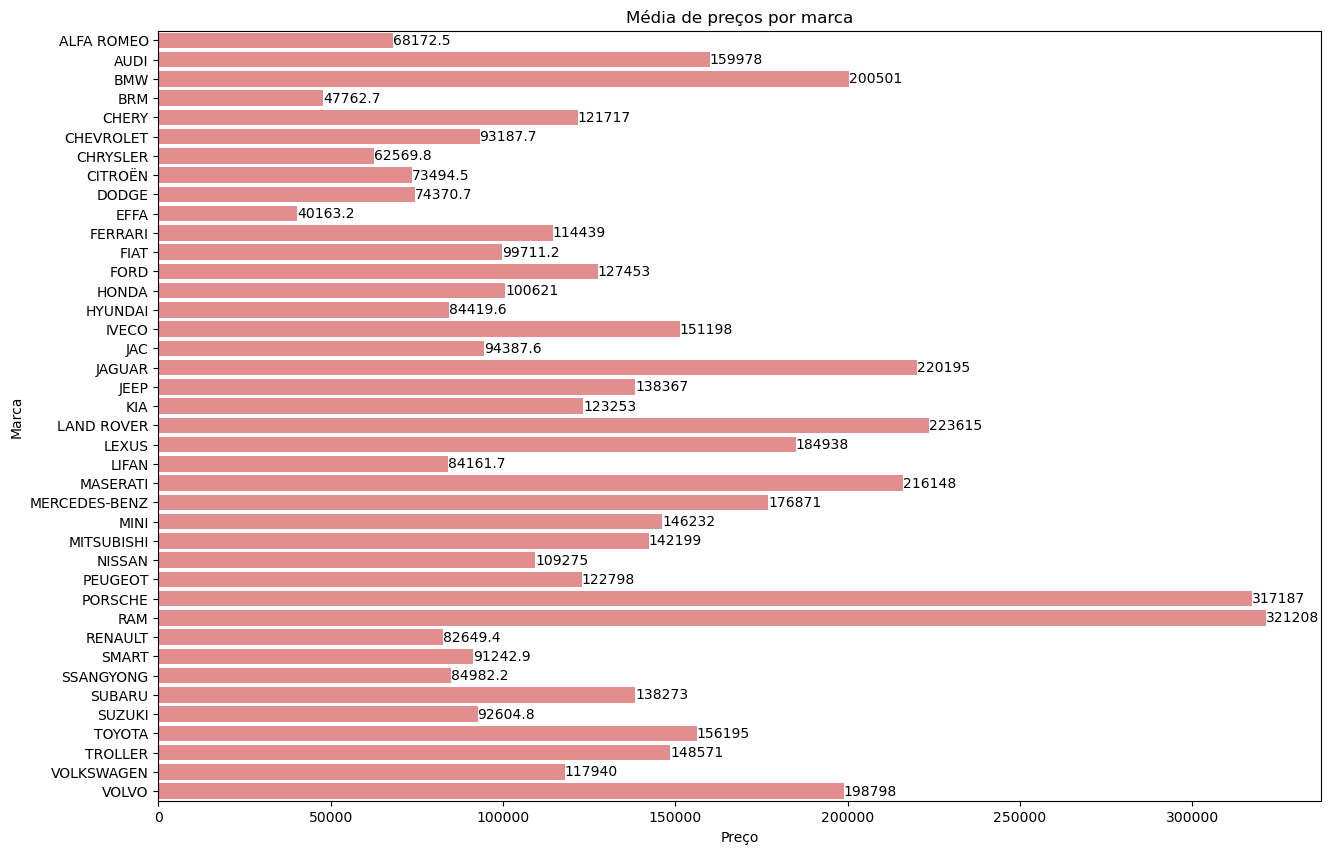

In [810]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(df.groupby('marca').preco.mean().reset_index(), x='preco', y='marca', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.xlabel('Preço')
plt.ylabel('Marca')
plt.title('Média de preços por marca')
plt.show()

### ano_de_fabricacao

In [811]:
print(f'Número de nulos da variável `ano_de_fabricacao`: {df.ano_de_fabricacao.isna().sum()}')

print('-'*64)

print('Top 10 anos com mais veículos vendidos')
display(
    df.value_counts('ano_de_fabricacao').head(10)
)

print('-'*64)

print('Venda dos últimos 10 anos')
display(
    df.value_counts('ano_de_fabricacao', sort=False).tail(10)
)

Número de nulos da variável `ano_de_fabricacao`: 0
----------------------------------------------------------------
Top 10 anos com mais veículos vendidos


ano_de_fabricacao
2020    4729
2017    4369
2019    3880
2018    3820
2021    2614
2013    2443
2014    2221
2016    1822
2015    1753
2012     509
dtype: int64

----------------------------------------------------------------
Venda dos últimos 10 anos


ano_de_fabricacao
2013    2443
2014    2221
2015    1753
2016    1822
2017    4369
2018    3820
2019    3880
2020    4729
2021    2614
2022      37
dtype: int64

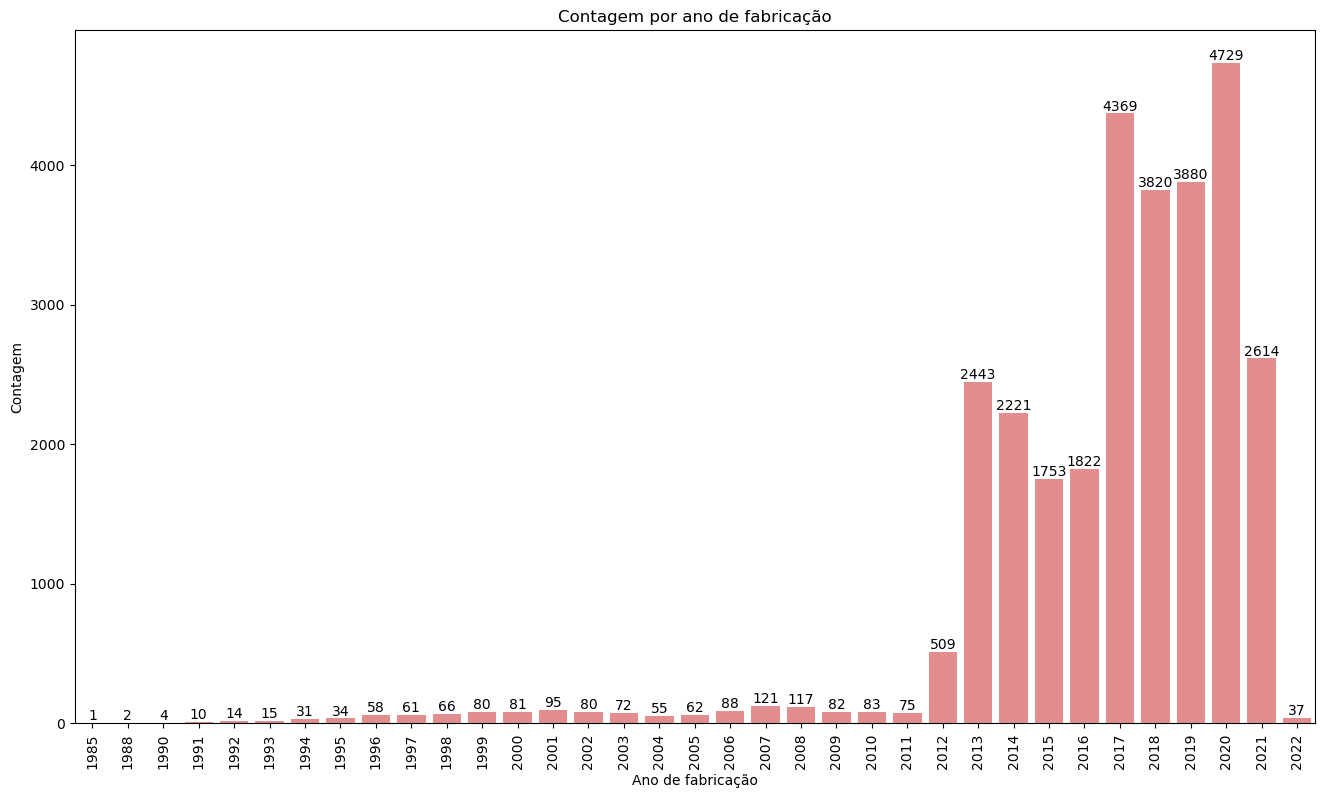

In [812]:
plt.figure(figsize=(16,9))
ax = sns.countplot(df, x='ano_de_fabricacao', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.ylabel('Contagem')
plt.xlabel('Ano de fabricação')
plt.xticks(rotation=90)
plt.title('Contagem por ano de fabricação')
plt.show()

In [813]:
agg_preco(df, 'ano_de_fabricacao')

,count,sum,mean,std,min,max
ano_de_fabricacao,,,,,,
2020,4729,702871216.290000,148629.990000,80156.350000,22935.930000,486869.600000
2017,4369,596779000.210000,136593.960000,82499.470000,16264.970000,683272.720000
2018,3820,569432874.820000,149066.200000,88275.740000,21414.770000,1349747.710000
2019,3880,563045159.600000,145114.730000,81102.230000,20759.090000,1154360.170000
2021,2614,371627144.440000,142168.000000,75306.890000,29678.390000,464786.420000
2013,2443,267275342.720000,109404.560000,73571.380000,21384.260000,739900.310000
2014,2221,258745833.110000,116499.700000,79480.470000,18729.070000,1359812.890000
2016,1822,243685996.460000,133746.430000,84603.170000,29400.900000,706087.580000
2015,1753,221918619.620000,126593.620000,78062.650000,14011.650000,1028431.260000


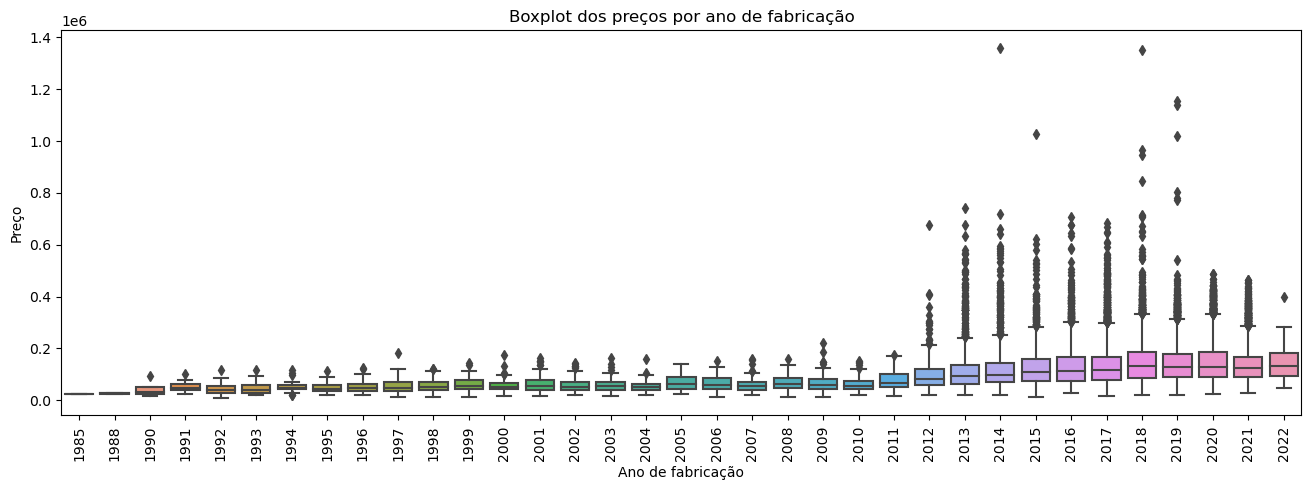

In [814]:
plt.figure(figsize=(16, 5))
ax = sns.boxplot(df, x='ano_de_fabricacao', y='preco')
plt.xlabel('Ano de fabricação')
plt.xticks(rotation=90)
plt.ylabel('Preço')
plt.title('Boxplot dos preços por ano de fabricação')
plt.show()

Se acompanharmos a linha da mediana dos boxplots podemos verificar que, em geral, carros de 2012 para 2022 estão vendendo por preços maiores. 

Em média, carros fabricados em 2022 têm o preço de R$ 147.2 mil, enquanto que carros de 2012 custam R$ 97.3 mil, que é aproximadamente 33% menor que os carros mais novos.

### ano_modelo

In [815]:
print(f'Número de nulos: {df.ano_modelo.isna().sum()}')

print('-'*64)

print('Top 10 anos com mais veículos vendidos')
display(
    df.value_counts('ano_modelo').head(10)
)

print('-'*64)

print('Vendas dos 10 últimos anos')
display(
    df.value_counts('ano_modelo', sort=False).tail(10)
)

Número de nulos: 0
----------------------------------------------------------------
Top 10 anos com mais veículos vendidos


ano_modelo
2021.0    5071
2017.0    4519
2018.0    4221
2019.0    3587
2020.0    3541
2015.0    2386
2014.0    2377
2013.0    1212
2016.0     890
2022.0     829
dtype: int64

----------------------------------------------------------------
Vendas dos 10 últimos anos


ano_modelo
2014.0    2377
2015.0    2386
2016.0     890
2017.0    4519
2018.0    4221
2019.0    3587
2020.0    3541
2021.0    5071
2022.0     829
2023.0      15
dtype: int64

Vamos realizar um tratamento para transformar a variável de `float` para `int`.

In [816]:
df['ano_modelo'] = df.ano_modelo.astype(int)

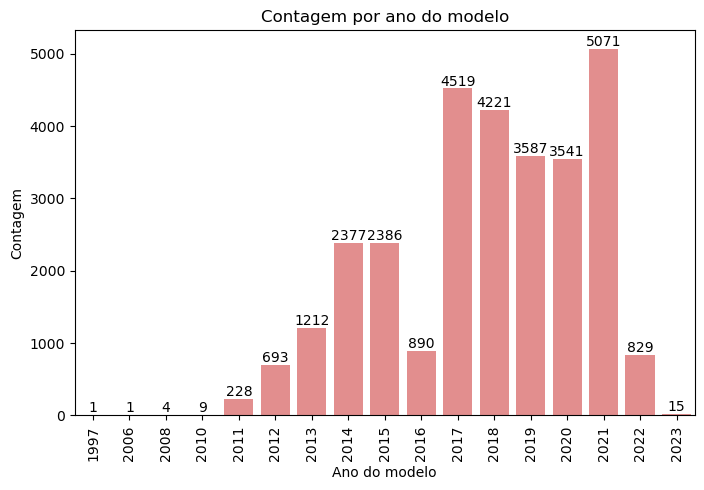

In [817]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(df, x='ano_modelo', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.ylabel('Contagem')
plt.xlabel('Ano do modelo')
plt.xticks(rotation=90)
plt.title('Contagem por ano do modelo')
plt.show()

In [818]:
agg_preco(df, 'ano_modelo')

,count,sum,mean,std,min,max
ano_modelo,,,,,,
2021,5071,721183775.130000,142217.270000,74798.620000,22935.930000,486869.600000
2017,4519,618773193.660000,136927.020000,82572.450000,16264.970000,1359812.890000
2018,4221,601078087.080000,142401.820000,86826.030000,21991.000000,966844.650000
2020,3541,535906034.830000,151343.130000,83385.130000,20759.090000,1154360.170000
2019,3587,533304218.190000,148676.950000,86553.090000,21414.770000,1349747.710000
2015,2386,276897932.500000,116051.100000,66479.560000,14011.650000,1028431.260000
2014,2377,268347009.890000,112893.150000,86487.280000,20452.090000,739900.310000
2016,890,114467881.260000,128615.600000,83912.490000,16289.990000,706087.580000
2022,829,111852267.610000,134924.330000,70696.550000,29678.390000,464786.420000


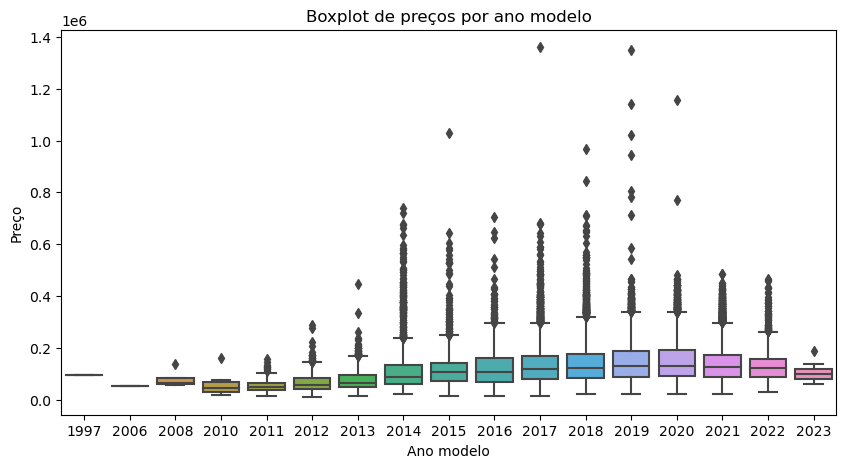

In [819]:
plt.figure(figsize=(10, 5))
sns.boxplot(df, x='ano_modelo', y='preco')
plt.xlabel('Ano modelo')
plt.ylabel('Preço')
plt.title('Boxplot de preços por ano modelo')
plt.show()

Curiosamente, esperava-se que veículos com ano modelo mais recente teriam preços maiores que veículos mais antigos, porém essa relação não fica bastante explícita uma vez que os carros de 2020 aparentam ser mais caros que os demais.

Além disso, há algum tipo de inconsistência: o menor ano do modelo é 1997 enquanto que o de fabricação é 1988. Vamos verificar:

In [820]:
# Selecionando apenas os veículos que possuem ano de fabricacao menor que 1997
df[df.ano_de_fabricacao < 1997].sort_values('ano_de_fabricacao').head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
590,317058348344627599337634039380150700902,8,VOLKSWAGEN,GOL,1.6 MI POWER 8V FLEX 4P MANUAL G.III,1985,2013,192182.0,Manual,4,Sedã,N,Prata,PF,Pomerode,Rio Grande do Sul (RS),Pessoa Física,False,False,False,NaN,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,22520.067767
13276,51936966583809049009169550364057097722,8,PEUGEOT,307,2.0 GRIFFE 16V GASOLINA 4P AUTOMÁTICO,1988,2011,163780.0,Automática,4,Hatchback,N,Prata,PF,Muzambinho,Rio Grande do Sul (RS),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,NaN,NaN,Todas as revisões feitas pela agenda do carro,NaN,24093.833734
19658,64369313258166945961672474305820655846,8,VOLKSWAGEN,FUSCA,1.6 8V GASOLINA 2P MANUAL,1988,2011,3548.0,Manual,4,Perua/SW,N,Prata,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,False,NaN,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,28875.849751
20366,122284606262184123093871909474981352865,8,LAND ROVER,DISCOVERY 3,2.7 HSE 4X4 V6 24V TURBO DIESEL 4P AUTOMÁTICO,1990,2012,106774.0,Automática,4,Sedã,N,Preto,PF,São Caetano do Sul,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,93421.288023
1156,120618350228284858326813530052157947976,16,FIAT,PALIO,1.3 MPI FIRE ELX WEEKEND 8V FLEX 4P MANUAL,1990,2013,171889.0,Manual,4,Hatchback,N,Prata,PJ,Ribeirão Pires,São Paulo (SP),Loja,True,True,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26669.839995


Pelo apresentado acima, temos um Fusca fabricado em 1988 e modelo 2011 e um Gol Flex fabricado em 1985, [antes mesmo do primeiro carro flex](https://olhardigital.com.br/2023/03/17/carros-e-tecnologia/carro-flex-completa-20-anos-de-estrada-no-brasil-saiba-mais-sobre-a-tecnologia/). 

Percebe-se que exitem algumas inconsistências neste conjunto de dados. Seria interessante comparar qual a diferença em anos entre fabricação e modelo de cada veículo:

In [821]:
# Diferença entre o ano_modelo e ano_de_fabricacao
df['diferenca_ano'] = df.ano_modelo - df.ano_de_fabricacao

display(
    df.value_counts('diferenca_ano').sort_index()
)

diferenca_ano
0     12119
1     14177
2      1767
3       334
4       130
5       119
6        88
7        71
8        62
9        63
10       78
11       80
12       87
13       82
14       68
15       69
16       58
17       40
18       36
19       18
20       15
21       11
22        7
23        4
28        1
dtype: int64

Neste [link](https://autopapo.uol.com.br/noticia/venda-de-carros-usados-ano-modelo-preco-tabela/) é informado que as negociações de veículo são feitas pelo ano modelo. Contudo, podem haver avaliações de veículos que sejam menores quando os modelos são de "duas cabeças", ou seja, quando são produzidas em um ano e o modelo de outro.

In [822]:
agg_preco(df, 'diferenca_ano')

,count,sum,mean,std,min,max
diferenca_ano,,,,,,
1,14177,1910755072.440000,134778.520000,79523.790000,16289.990000,1349747.710000
0,12119,1702727993.800000,140500.700000,85418.910000,14011.650000,1140112.650000
2,1767,208972520.340000,118264.020000,66121.310000,17911.210000,674366.330000
3,334,39996785.200000,119750.850000,96850.200000,21639.390000,1359812.890000
4,130,10286253.990000,79125.030000,47633.770000,13642.890000,298571.480000
5,119,7652507.370000,64306.780000,25925.310000,14562.300000,153921.760000
6,88,5655331.420000,64265.130000,28540.680000,25553.690000,160157.080000
12,87,5171982.010000,59448.070000,32154.320000,16283.020000,174045.760000
11,80,5074810.510000,63435.130000,28410.770000,15953.200000,149952.930000


Como esperado, quanto maior a diferença entre anos menor o preço do carro. Talvez a feature `diferenca_ano` criada possa ser útil na etapa de Machine Learning.


A empresa que recebeu este conjunto de dados precisaria realizar uma investigação mais a fundo sobre essa diferença entre ano modelo e ano fabricação. A princípio estaremos mantendo essas informações, mas seria ao menos interessante compatibilizar as versões dos carros com seus respectivos anos modelos. 

### hodometro

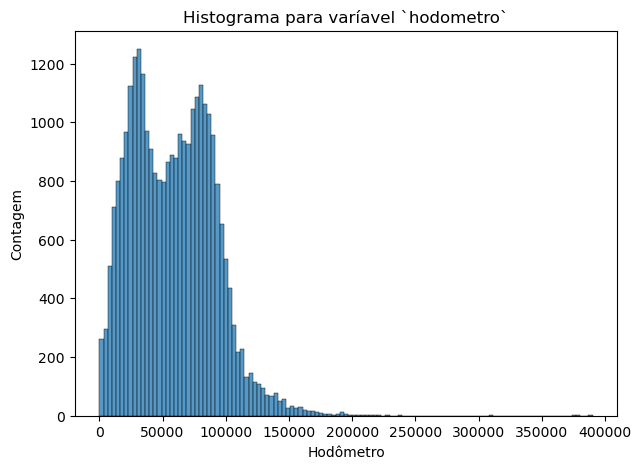

In [823]:
# Valores de hodômetro
plt.figure(figsize=(7, 5))
sns.histplot(df, x='hodometro')
plt.xlabel('Hodômetro')
plt.ylabel('Contagem')
plt.title('Histograma para varíavel `hodometro`')
plt.show()

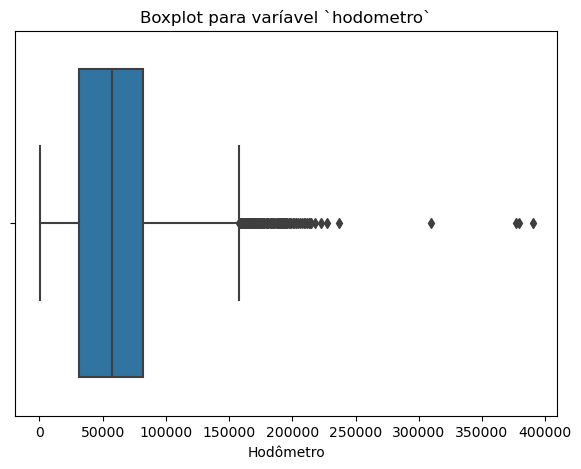

In [824]:
plt.figure(figsize=(7, 5))
sns.boxplot(df, x='hodometro')
plt.xlabel('Hodômetro')
plt.title('Boxplot para varíavel `hodometro`')
plt.show()

In [825]:
# Verificando os outliers do hodômetro
df.sort_values('hodometro', ascending=False).head(5)

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco,diferenca_ano
19895,126955414445370751127432133125076302039,8,FORD,TRANSIT,2.4 FURGÃO LONGO TURBO DIESEL 3P MANUAL,2001,2012,390065.0,Manual,2,Picape,N,Branco,PF,Campinas,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,122236.968801,11
591,176459444870073105374190357587524594057,8,FIAT,COUPÉ,2.0 16V GASOLINA 2P MANUAL,1997,2012,379155.0,Manual,2,Picape,N,Prata,PF,Santos,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,45647.183036,15
4960,255524433019265656171123303995467059480,8,FORD,RANGER,2.8 XLT LIMITED 4X4 CD 8V TURBO INTERCOOLER DI...,1991,2013,376712.0,Manual,2,Picape,N,Prata,PF,São Paulo,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,Todas as revisões feitas pela agenda do carro,NaN,66526.753957,22
25466,266733556249083435259295458504902452434,8,FORD,RANGER,4.0 STX 4X2 CE V6 12V GASOLINA 2P MANUAL,1994,2012,309465.0,Manual,2,Picape,N,Prata,PF,Serraria,Rio de Janeiro (RJ),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,47107.361433,18
25256,264844634239316365552041657795969597881,8,MERCEDES-BENZ,C 180,1.8 CLASSIC PLUS GASOLINA 4P AUTOMÁTICO,1999,2014,237288.0,Automática,4,Sedã,N,Preto,PF,Guarulhos,São Paulo (SP),Pessoa Física,False,False,False,NaN,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,30932.412728,15


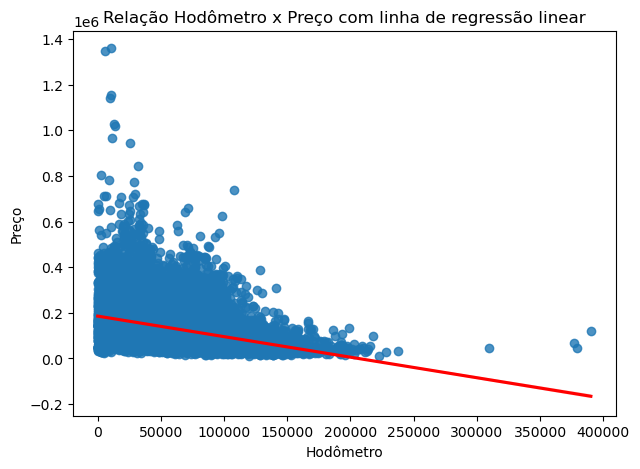

In [826]:
plt.figure(figsize=(7, 5))
sns.regplot(df, x='hodometro', y='preco', line_kws={'color':'red'})
plt.xlabel('Hodômetro')
plt.ylabel('Preço')
plt.title('Relação Hodômetro x Preço com linha de regressão linear')
plt.show()

Esperava-se que um valor maior no hodômetro implica-se num valor menor do preço, e essa relação pode ser verificada pela linha da regressão que está decrescendo.

Vamos verificar como se distribuem os dados quando aplicamos log10 aos valores do hodômetro.

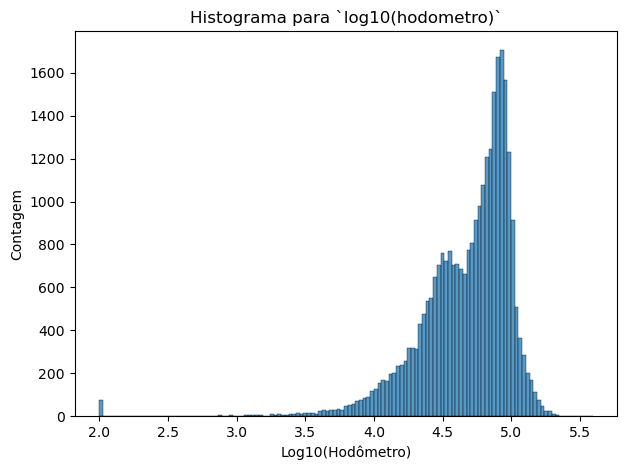

In [827]:
plt.figure(figsize=(7, 5))
sns.histplot(x=df['hodometro'].apply(np.log10))
plt.xlabel('Log10(Hodômetro)')
plt.ylabel('Contagem')
plt.title('Histograma para `log10(hodometro)`')
plt.show()

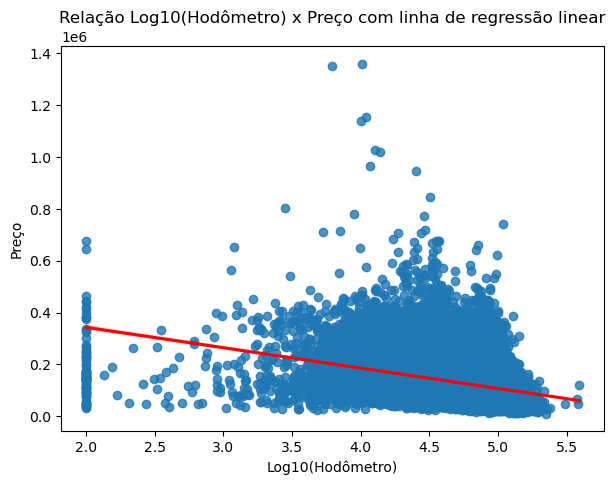

In [828]:
plt.figure(figsize=(7, 5))
sns.regplot(x=df['hodometro'].apply(np.log10), y=df['preco'], line_kws={'color':'red'})
plt.xlabel('Log10(Hodômetro)')
plt.ylabel('Preço')
plt.title('Relação Log10(Hodômetro) x Preço com linha de regressão linear')
plt.show()

### cambio

Número de nulos na variável cambio: 0


cambio,Automática,Manual,CVT,Automatizada,Automatizada DCT,Semi-automática,Automática Sequencial
quantidade,22545,4989,1792,139,53,41,25


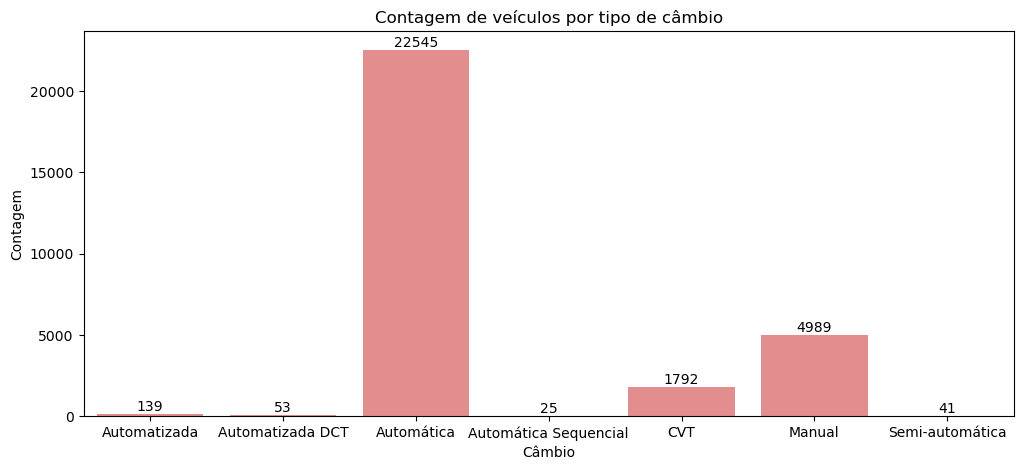

In [829]:
# Variável `cambio`

# Número de nulos
print(f'Número de nulos na variável cambio: {df.cambio.isna().sum()}')

display(
    df.value_counts('cambio').to_frame().rename(columns={0: 'quantidade'}).T
)

plt.figure(figsize=(12, 5))
ax = sns.countplot(df.sort_values('cambio'), x='cambio', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.ylabel('Contagem')
plt.xlabel('Câmbio')
plt.title('Contagem de veículos por tipo de câmbio')
plt.show()

In [830]:
agg_preco(df, 'cambio')

,count,sum,mean,std,min,max
cambio,,,,,,
Automática,22545,3292646638.880000,146047.760000,84686.120000,15953.200000,1359812.890000
Manual,4989,402677444.190000,80713.060000,48535.580000,9869.950000,1140112.650000
CVT,1792,206487237.200000,115227.250000,42801.640000,21414.770000,348983.270000
Automatizada,139,17368936.570000,124956.380000,94326.840000,28954.030000,416020.330000
Automatizada DCT,53,10893809.680000,205543.580000,115358.970000,71797.850000,564073.940000
Semi-automática,41,3859109.940000,94124.630000,49601.360000,30359.740000,232694.310000
Automática Sequencial,25,1445285.920000,57811.440000,28604.770000,22761.350000,128081.350000


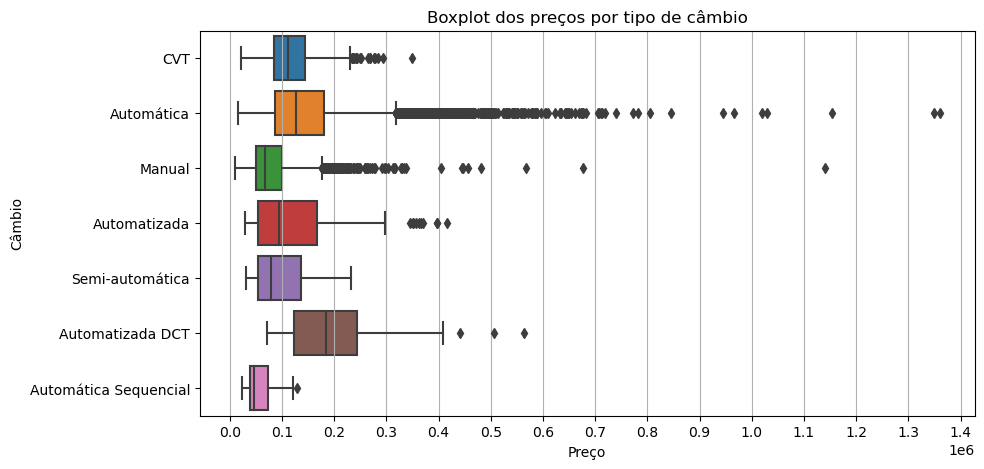

In [831]:
plt.figure(figsize=(10, 5))
sns.boxplot(df, y='cambio', x='preco')
plt.ylabel('Câmbio')
plt.xlabel('Preço')
plt.title('Boxplot dos preços por tipo de câmbio')
plt.xticks(np.arange(0, 1400001, 100000))
plt.grid(True, axis='x')
plt.show()

Como esperado, os valores dos veículos com câmbio manual são menores que os de câmbio automático.

Enquanto as análises estavam sendo realizadas, notei que algumas das versões dos carros apontavam quando o carro era automático. Notei também que alguns deles não condiziam com o câmbio especificado:

In [832]:
df[(df.versao.str.contains('AUTOM')) & (df.cambio.str.contains('Manual'))][['marca', 'modelo', 'versao', 'cambio']]

,marca,modelo,versao,cambio
19,CHEVROLET,ONIX,1.0 TURBO FLEX PLUS PREMIER AUTOMÁTICO,Manual
343,JEEP,RENEGADE,1.8 16V FLEX LONGITUDE 4P AUTOMÁTICO,Manual
533,CHEVROLET,ONIX,1.0 TURBO FLEX PLUS PREMIER AUTOMÁTICO,Manual
794,HYUNDAI,HB20,1.6 16V FLEX VISION AUTOMÁTICO,Manual
1091,PEUGEOT,2008,1.6 16V FLEX GRIFFE 4P AUTOMÁTICO,Manual
...,...,...,...,...
27592,TOYOTA,HILUX SW4,3.0 SRV 4X4 16V TURBO INTERCOOLER DIESEL 4P AU...,Manual
27875,BMW,M 240i,3.0 24V TURBO GASOLINA 2P AUTOMÁTICO,Manual
28233,CHEVROLET,ONIX,1.0 TURBO FLEX PREMIER AUTOMÁTICO,Manual
28355,PEUGEOT,2008,1.6 16V FLEX CROSSWAY 4P AUTOMÁTICO,Manual


In [833]:
df[(df.versao.str.contains('MANUAL')) & (~df.cambio.str.contains('Manual'))][['marca', 'modelo', 'versao', 'cambio']]

,marca,modelo,versao,cambio
1050,FORD,RANGER,2.5 XLT 4X2 CD 16V FLEX 4P MANUAL,Automática
2666,FIAT,TORO,1.8 16V EVO FLEX ENDURANCE MANUAL,Automática
2833,VOLKSWAGEN,SPACE CROSS,1.6 MI 8V FLEX 4P MANUAL,Semi-automática
4992,FIAT,TORO,1.8 16V EVO FLEX ENDURANCE MANUAL,Automática
5907,FIAT,TORO,1.8 16V EVO FLEX ENDURANCE MANUAL,Automática
7106,MINI,COOPER,1.6 S JOHN COOPER WORKS 16V TURBO GASOLINA 2P ...,Automática
8178,HYUNDAI,HB20,1.6 COMFORT PLUS 16V FLEX 4P MANUAL,Automática
9169,FIAT,MOBI,1.0 EVO FLEX LIKE. MANUAL,Automática
9425,CHEVROLET,SPIN,1.8 LTZ 8V FLEX 4P MANUAL,Automática
10320,FIAT,TORO,1.8 16V EVO FLEX ENDURANCE MANUAL,Automática


In [834]:
df1 = df.copy()

# Criando uma coluna nova para substituir a coluna de tipos original

# Verificando quando as substring são encontradas na coluna de versao
automatica = df.versao.str.contains('AUTOM').map({True: 'Automática', False: ''}).to_list()
manual = df.versao.str.contains('MANUAL').map({True: 'Manual', False: ''}).to_list()

# inicializando a lista e concatenando cada uma das listas elemento a elemento
cambios_novos = []
for cambio_autom, cambio_manual, cambio_original in zip(automatica, manual, df.cambio.to_list()):
    # Caso alguma das substrings seja encontrada, vamos concatenar ela ao elemento da lista de tipos
    if (cambio_autom != '') | (cambio_manual != ''):
        cambios_novos.append(cambio_autom + cambio_manual)
    # Caso não seja encontrado nenhuma das substrings verificadas acima, adicione o item original da coluna tipo
    else:
        cambios_novos.append(cambio_original)

cambios_novos

df1['cambio'] = cambios_novos

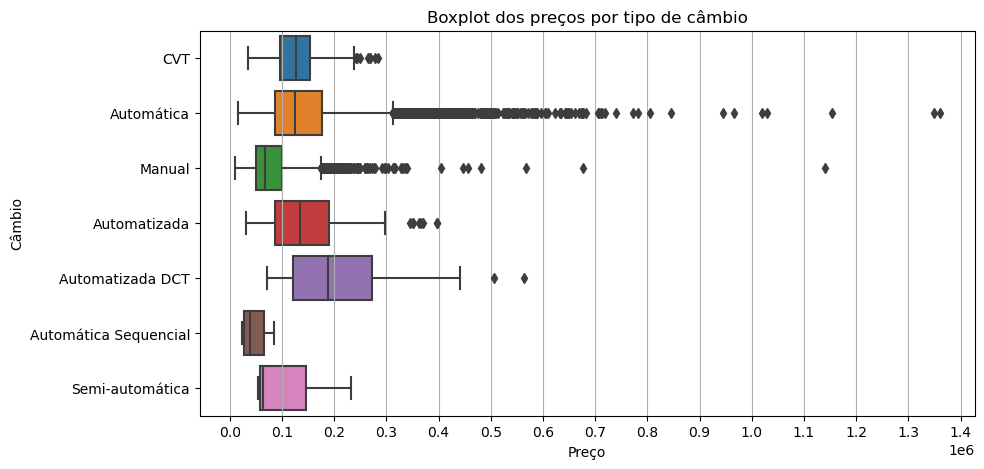

In [835]:
plt.figure(figsize=(10, 5))
sns.boxplot(df1, y='cambio', x='preco')
plt.ylabel('Câmbio')
plt.xlabel('Preço')
plt.title('Boxplot dos preços por tipo de câmbio')
plt.xticks(np.arange(0, 1400001, 100000))
plt.grid(True, axis='x')
plt.show()

In [836]:
print('Dados originais')
display(
    agg_preco(df, 'cambio')
)

print('Dados alterados')
display(
    agg_preco(df1, 'cambio')
)

Dados originais


,count,sum,mean,std,min,max
cambio,,,,,,
Automática,22545,3292646638.880000,146047.760000,84686.120000,15953.200000,1359812.890000
Manual,4989,402677444.190000,80713.060000,48535.580000,9869.950000,1140112.650000
CVT,1792,206487237.200000,115227.250000,42801.640000,21414.770000,348983.270000
Automatizada,139,17368936.570000,124956.380000,94326.840000,28954.030000,416020.330000
Automatizada DCT,53,10893809.680000,205543.580000,115358.970000,71797.850000,564073.940000
Semi-automática,41,3859109.940000,94124.630000,49601.360000,30359.740000,232694.310000
Automática Sequencial,25,1445285.920000,57811.440000,28604.770000,22761.350000,128081.350000


Dados alterados


,count,sum,mean,std,min,max
cambio,,,,,,
Automática,23624,3402152101.620000,144012.530000,83802.490000,15953.200000,1359812.890000
Manual,4931,396162675.160000,80341.240000,48302.150000,9869.950000,1140112.650000
CVT,912,117014721.970000,128305.620000,42163.530000,34475.680000,283781.750000
Automatizada DCT,46,9722540.550000,211359.580000,122018.230000,71797.850000,564073.940000
Automatizada,58,9352823.860000,161255.580000,103915.320000,30407.520000,397694.230000
Semi-automática,6,645096.670000,107516.110000,76086.270000,54248.300000,232694.310000
Automática Sequencial,7,328502.560000,46928.940000,24921.850000,22761.350000,84600.260000


### num_portas

Número de nulos na variável `num_portas`: 0


num_portas,4,2,3
quantidade,28697,868,19


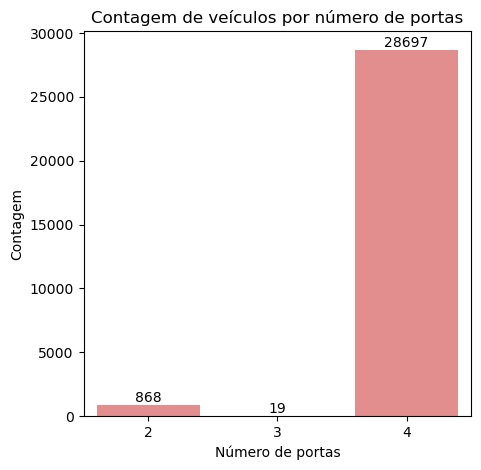

In [837]:
# Variável `num_portas`

print(f'Número de nulos na variável `num_portas`: {df.num_portas.isna().sum()}')

display(
    df.value_counts('num_portas').to_frame().rename(columns={0: 'quantidade'}).T
)

plt.figure(figsize=(5, 5))
ax = sns.countplot(df.sort_values('num_portas'), x='num_portas', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.ylabel('Contagem')
plt.xlabel('Número de portas')
plt.title('Contagem de veículos por número de portas')
plt.show()

In [838]:
# Vamos verificar os carros com 3 portas
df[df.num_portas == 3].head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco,diferenca_ano
734,63833503557727963117144856024451837146,15,FIAT,DUCATO,2.3 MULTIJET DIESEL MAXICARGO MANUAL,2019,2020,25359.0,Manual,3,Picape,N,Branco,PJ,São José do Rio Preto,São Paulo (SP),Loja,True,True,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163758.616520,1
791,52406443374972496219439907843051712946,14,VOLKSWAGEN,SAVEIRO,1.6 CROSS CE 16V FLEX 2P MANUAL,2015,2016,95656.0,Manual,3,Picape,N,Branco,PJ,Guaíba,Rio de Janeiro (RJ),Loja,True,True,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125619.258582,1
2047,221840944585208773857515626266413117720,14,MERCEDES-BENZ,CLC 200 K,1.8 KOMPRESSOR 16V GASOLINA 2P AUTOMATICO,1999,2014,153909.0,Automática,3,Picape,N,Prata,PJ,Ribeirão Pires,São Paulo (SP),Loja,True,True,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,134619.532624,15
2660,209052999009686863855587096190582220393,8,RENAULT,SANDERO,1.6 16V SCE FLEX STEPWAY MANUAL,2017,2018,80189.0,Manual,3,Picape,N,Branco,PJ,Taboão da Serra,São Paulo (SP),Loja,True,True,False,Aceita troca,Único dono,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,Todas as revisões feitas pela agenda do carro,NaN,61088.508200,1
4411,208623035278673781563602245202263825307,13,TOYOTA,HILUX,3.0 SRV 4X4 CD 16V TURBO INTERCOOLER DIESEL 4P...,2014,2015,89398.0,Automática,3,Picape,N,Branco,PJ,Rio de Janeiro,Rio de Janeiro (RJ),Loja,True,True,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,112589.345348,1


Apesar de realmente existirem alguns [carros com 3 portas](https://globoplay.globo.com/v/3005381/), no dataset percebe-se inconsistência, visto que nos nomes das versões temos veículos com 2 portas, uma vez que possuem `2P` em sua descrição (ex: 1.6 CROSS CE 16V FLEX 2P MANUAL).

In [839]:
df[df.modelo == 'STRADA'].value_counts(['versao', 'num_portas']).to_frame().reset_index().sort_values('versao').head()

,versao,num_portas,0
4,1.3 FIREFLY FLEX FREEDOM CD MANUAL,4,7
2,1.3 FIREFLY FLEX FREEDOM CS MANUAL,4,39
10,1.3 FIREFLY FLEX FREEDOM CS MANUAL,2,3
5,1.3 FIREFLY FLEX VOLCANO CD MANUAL,4,6
6,1.4 FIRE FLEX ENDURANCE CD MANUAL,4,6


Verificando mais de perto, como ilustrado acima, percebe-se que algumas versões estão com números de portas incompatíveis.
Aproveitando a análise do número de portas, vale ressaltar que CS, CE e CD nas descrições provavelmente se referem a, respecitvamente, Cabine Simples, Cabine Estendida e Cabine Dupla.

A seguir, vamos verificar como se correlacionam os preços com a variável `num_portas`.

In [840]:
agg_preco(df, 'num_portas')

,count,sum,mean,std,min,max
num_portas,,,,,,
4,28697,3786996496.920000,131964.890000,79639.560000,9869.950000,1349747.710000
2,868,146597926.740000,168891.620000,127348.330000,17720.560000,1359812.890000
3,19,1784038.720000,93896.770000,48310.190000,26982.470000,179691.610000


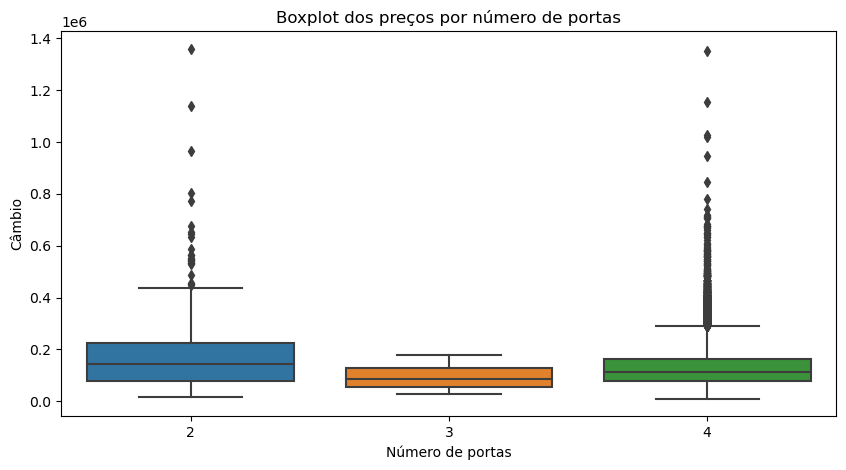

In [841]:
plt.figure(figsize=(10, 5))
sns.boxplot(df, x='num_portas', y='preco')
plt.ylabel('Câmbio')
plt.xlabel('Número de portas')
plt.title('Boxplot dos preços por número de portas')
plt.show()

A seguir, queremos verificar se, para os carros que possuem modelos com diferentes números de portas, existe algum número específico de portas que resulte em valores maiores.

Para isso, vamos selecionar apenas os carros que possuem modelos com diferentes números de portas, calcularemos a mediana e destacamos em verde os maiores valores por modelo.

In [842]:
nportas = df.groupby(['marca', 'modelo', 'num_portas']).agg({'preco': ['median']}).preco.reset_index()

pd.pivot(nportas[nportas.modelo.duplicated(keep=False)], index=['marca', 'modelo'], columns=['num_portas'], values=['median']) \
    .style.apply(highlight_max, axis=1)

Pelas observações acima, para os veículos que possuem diferentes números de portas, não fica aparente nenhum tipo de relação entre o número de portas e o preço do veículo.

### tipo

Número de nulos da variável `tipo`: 0


tipo,Sedã,Hatchback,Picape,Utilitário esportivo,Perua/SW,Cupê,Minivan
0,16429,4924,4849,3322,27,26,7


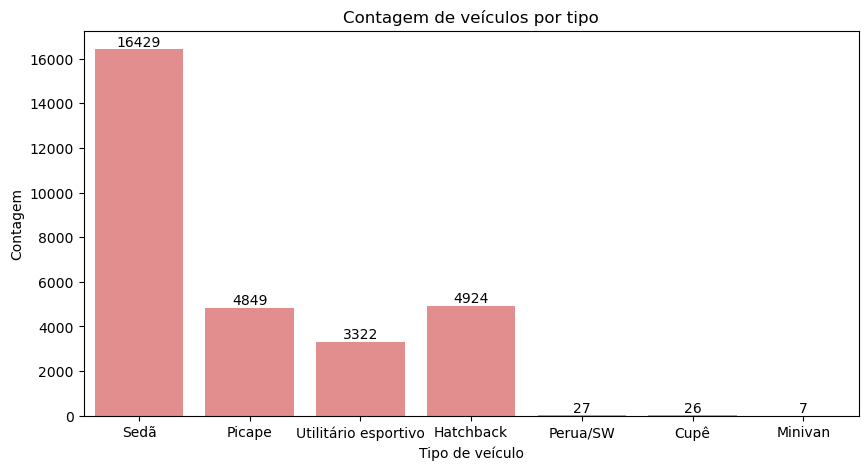

In [843]:
# Variável `tipo`

# Nulos
print(f'Número de nulos da variável `tipo`: {df.tipo.isna().sum()}')

# Contagem
display(
    df.value_counts('tipo').to_frame().T
)

plt.figure(figsize=(10, 5))
ax = sns.countplot(df, x='tipo', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.xlabel('Tipo de veículo')
plt.ylabel('Contagem')
plt.title('Contagem de veículos por tipo')
plt.show()

Para um mesmo modelo, parece razóavel termos diferentes tipos, como por exemplo o [Ford Ka](https://www.dimasauto.com.br/ford/ford-ka/ford-ka-sedan-ou-hatch/). Contudo, a mesma versão não deveria ter diferentes tipos, conforme o resultado abaixo:

In [844]:
# Printando o data frame para as colunas com SEDAN
def highlight_sedan(value):
    if 'SEDAN' in str(value):
        return 'background-color: green'
    else:
        return ''

df[df.modelo == 'KA'][['marca', 'versao', 'tipo']] \
    .sort_values('versao').drop_duplicates() \
    .style.applymap(highlight_sedan)

,marca,versao,tipo
29409,FORD,1.0 MPI 8V FLEX 2P MANUAL,Picape
16305,FORD,1.0 MPI 8V FLEX 2P MANUAL,Hatchback
9177,FORD,1.0 TI-VCT FLEX SE MANUAL,Picape
9347,FORD,1.0 TI-VCT FLEX SE MANUAL,Hatchback
11350,FORD,1.0 TI-VCT FLEX SE PLUS MANUAL,Hatchback
2900,FORD,1.0 TI-VCT FLEX SE PLUS SEDAN MANUAL,Sedã
18060,FORD,1.0 TI-VCT FLEX SE SEDAN MANUAL,Sedã
27653,FORD,1.0 TI-VCT FLEX SE SEDAN MANUAL,Hatchback
2862,FORD,1.0 TI-VCT FLEX SEL MANUAL,Sedã
16915,FORD,1.0 TI-VCT FLEX TECNO MANUAL,Sedã


Muito pior, temos alguns carros que estão com a versão Sedan porém com tipo diferente, como Hatchback, neste caso.

In [845]:
# SEDAN
print(f"Número de veículos sedan que não estão classificados corretamente: \
{df[(df.versao.str.contains('SEDAN')) & (df.tipo != 'Sedã')].shape[0]}")
# Data frame
display(
    df[(df.versao.str.contains('SEDAN')) & (df.tipo != 'Sedã')][['marca', 'modelo', 'versao', 'tipo']]
)

print('-'*64)

# HATCH
print(f"Número de veículos hatch que não estão classificados corretamente: \
{df[(df.versao.str.contains('HATCH')) & (df.tipo != 'Hatchback')].shape[0]}")
# Data frame
display(
    df[(df.versao.str.contains('HATCH')) & (df.tipo != 'Hatchback')][['marca', 'modelo', 'versao', 'tipo']]
)

print('-'*64)

print(f"Número de veículos coupês que não estão classificados corretamente: \
{df[(df.versao.str.contains('COUP')) & (df.tipo != 'Cupê')].shape[0]}")

display(
    df[df.versao.str.contains('COUP') & (df.tipo != 'Cupê')][['marca', 'modelo', 'versao', 'tipo']]
)

Número de veículos sedan que não estão classificados corretamente: 112


,marca,modelo,versao,tipo
366,AUDI,S3,2.0 TFSI SEDAN QUATTRO GASOLINA 4P S-TRONIC,Hatchback
425,BMW,535i,3.0 SEDAN 6 CILINDROS 24V TURBO GASOLINA 4P AU...,Utilitário esportivo
812,MERCEDES-BENZ,A 200,1.3 CGI GASOLINA STYLE SEDAN 7G-DCT,Picape
942,AUDI,A3,2.0 TFSI SEDAN AMBITION 16V GASOLINA 4P S-TRONIC,Hatchback
996,FORD,FOCUS,2.0 SE PLUS SEDAN 16V FLEX 4P POWERSHIFT,Utilitário esportivo
...,...,...,...,...
28547,MERCEDES-BENZ,C 350,3.5 CGI SPORT SEDAN V6 GASOLINA 4P AUTOMÁTICO,Utilitário esportivo
28851,AUDI,A3,2.0 TFSI SEDAN AMBITION 16V GASOLINA 4P S-TRONIC,Hatchback
28944,AUDI,A3,1.4 TFSI SEDAN AMBIENTE 16V FLEX 4P TIPTRONIC,Hatchback
29046,AUDI,A3,2.0 TFSI GASOLINA SEDAN PERFORMANCE BLACK S-TR...,Utilitário esportivo


----------------------------------------------------------------
Número de veículos hatch que não estão classificados corretamente: 9


,marca,modelo,versao,tipo
1788,FORD,FIESTA,1.6 SE HATCH 16V FLEX 4P MANUAL,Sedã
5307,FORD,FIESTA,1.5 S HATCH 16V FLEX 4P MANUAL,Picape
10640,FORD,FIESTA,1.6 MPI CLASS HATCH 8V FLEX 4P MANUAL,Sedã
14599,BMW,120i,2.0 HATCH 16V GASOLINA 2P AUTOMÁTICO,Picape
14652,FORD,FIESTA,1.6 SEL HATCH 16V FLEX 4P POWERSHIFT,Sedã
14751,CHEVROLET,VECTRA,2.0 SFI GT HATCH 8V FLEX 4P MANUAL,Perua/SW
16650,FORD,FIESTA,1.0 ECOBOOST TITANIUM PLUS HATCH 12V GASOLINA ...,Sedã
17984,FORD,FIESTA,1.6 SE STYLE HATCH 16V FLEX 4P MANUAL,Sedã
24180,BMW,130i,3.0 SPORT HATCH 24V GASOLINA 4P AUTOMÁTICO,Picape


----------------------------------------------------------------
Número de veículos coupês que não estão classificados corretamente: 281


,marca,modelo,versao,tipo
32,BMW,X6,3.0 35I 4X4 COUPÉ 6 CILINDROS 24V GASOLINA 4P ...,Sedã
395,AUDI,TT,2.0 TFSI COUPÉ AMBITION 2P GASOLINA S-TRONIC,Picape
569,BMW,218i,1.5 TWINTURBO GASOLINA GRAN COUPE SPORT GP STE...,Sedã
618,MERCEDES-BENZ,C 180,1.6 CGI GASOLINA AVANTGARDE COUPÉ 9G-TRONIC,Picape
878,AUDI,TT,2.0 TFSI COUPÉ AMBITION 2P GASOLINA S-TRONIC,Picape
...,...,...,...,...
29065,MERCEDES-BENZ,C 180,1.6 CGI GASOLINA SPORT COUPÉ 9G-TRONIC,Picape
29074,BMW,X6,4.4 M SPORT 4X4 COUPÉ V8 32V BI-TURBO GASOLINA...,Sedã
29278,BMW,M6,4.4 GRAN COUPÉ V8 32V GASOLINA 4P AUTOMÁTICO,Hatchback
29498,MERCEDES-BENZ,GLC 250,2.0 CGI GASOLINA COUPÉ 4MATIC 9G-TRONIC,Utilitário esportivo


Como mencionado na seção `num_portas`, CS, CE e CD se referem ao tipo de cabine do veículo. É razoável que as picapes apresentem essas siglas no nome de suas versões. Vejamos quais se enquadriam neste caso.

In [846]:
df[df.versao.str.contains(' CS | CD | CE ')][['marca', 'modelo',]].drop_duplicates().sort_values(['marca', 'modelo'])

,marca,modelo
9717,CHEVROLET,ASTRA
5690,CHEVROLET,CORSA
19492,CHEVROLET,D20
117,CHEVROLET,MONTANA
1938,CHEVROLET,OMEGA
190,CHEVROLET,S10
9254,CHEVROLET,SILVERADO
5668,CHEVROLET,ZAFIRA
4658,DODGE,DAKOTA
21484,DODGE,RAM


Em uma olhada rápida, os veículos Zafira, Astra e Omega não são picapes:

In [847]:
df[df.modelo.str.contains('ZAFIRA|ASTRA|OMEGA')][['marca', 'modelo', 'versao']].drop_duplicates().sort_values(['marca', 'modelo', 'versao'])

,marca,modelo,versao
19386,CHEVROLET,ASTRA,1.8 MPFI GL 8V GASOLINA 2P MANUAL
24554,CHEVROLET,ASTRA,1.8 MPFI GL SEDAN 8V GASOLINA 4P MANUAL
3021,CHEVROLET,ASTRA,2.0 MPFI ADVANTAGE 8V FLEX 4P MANUAL
29048,CHEVROLET,ASTRA,2.0 MPFI ADVANTAGE SEDAN 8V FLEX 4P AUTOMÁTICO
6951,CHEVROLET,ASTRA,2.0 MPFI ADVANTAGE SEDAN 8V FLEX 4P MANUAL
9717,CHEVROLET,ASTRA,2.0 MPFI CD SEDAN 8V GASOLINA 4P AUTOMÁTICO
6868,CHEVROLET,ASTRA,2.0 MPFI SPORT 8V GASOLINA 2P MANUAL
1938,CHEVROLET,OMEGA,3.6 SFI CD V6 24V GASOLINA 4P AUTOMÁTICO
5668,CHEVROLET,ZAFIRA,2.0 MPFI CD 8V GASOLINA 4P AUTOMÁTICO
6547,CHEVROLET,ZAFIRA,2.0 MPFI COMFORT 8V FLEX 4P MANUAL


In [848]:
# Quantidade de veículos por tipo dos veículos que deveriam ser considerados como picapes
df[(df.versao.str.contains(' CS | CD | CE ')) & (df.modelo != 'ZAFIRA') & (df.modelo != 'ASTRA') & (df.modelo != 'OMEGA')]['tipo'].value_counts()

Picape                  2655
Hatchback                424
Sedã                     127
Cupê                       6
Utilitário esportivo       2
Name: tipo, dtype: int64

In [849]:
# Criando uma coluna nova para substituir a coluna de tipos original

# Verificando quando as substring são encontradas na coluna de versao
hatch = df.versao.str.contains('HATCH').map({True: 'Hatchback', False: ''}).to_list()
coupe = df.versao.str.contains('COUP').map({True: 'Cupê', False: ''}).to_list()
sedan = df.versao.str.contains('SEDAN').map({True: 'Sedã', False: ''}).to_list()
picape = ((df.versao.str.contains(' CS | CD | CE ')) & (df.modelo != 'ZAFIRA') & (df.modelo != 'ASTRA') & (df.modelo != 'OMEGA')).map({True: 'Picape', False: ''}).to_list()

# inicializando a lista e concatenando cada uma das listas elemento a elemento
tipos_novos = []
for car_h, car_c, car_s, car_p, tipo in zip(hatch, coupe, sedan, picape, df.tipo.to_list()):
    # Caso alguma das substrings seja encontrada, vamos concatenar ela ao elemento da lista de tipos
    if (car_h != '') | (car_c != '') | (car_s != '') | (car_p != ''):
        tipos_novos.append(car_h + car_c + car_s + car_p )
    # Caso não seja encontrado nenhuma das substrings verificadas acima, adicione o item original da coluna tipo
    else:
        tipos_novos.append(tipo)

tipos_novos

df1['tipo'] = tipos_novos

In [850]:
# No data frame original, verificar apenas as linhas que foram alteradas
display(
    df[((df1.tipo == df.tipo) == False)][['marca', 'modelo', 'versao', 'tipo']]
)

print(f'Foram alterados {df[((df1.tipo == df.tipo) == False)].shape[0]} tipos de veículos.')

,marca,modelo,versao,tipo
32,BMW,X6,3.0 35I 4X4 COUPÉ 6 CILINDROS 24V GASOLINA 4P ...,Sedã
63,VOLKSWAGEN,AMAROK,3.0 V6 TDI DIESEL HIGHLINE CD 4MOTION AUTOMÁTICO,Hatchback
117,CHEVROLET,MONTANA,1.4 MPFI LS CS 8V FLEX 2P MANUAL,Hatchback
149,VOLKSWAGEN,AMAROK,3.0 V6 TDI DIESEL HIGHLINE CD 4MOTION AUTOMÁTICO,Sedã
350,TOYOTA,HILUX,2.7 SRV 4X4 CD 16V FLEX 4P AUTOMÁTICO,Hatchback
...,...,...,...,...
29516,BMW,M2,3.0 24V I6 GASOLINA COUPÉ M DCT,Picape
29526,CHEVROLET,MONTANA,1.4 MPFI LS CS 8V FLEX 2P MANUAL,Hatchback
29536,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,Hatchback
29555,BMW,M3,3.0 I6 GASOLINA SEDAN AUTOMÁTICO,Hatchback


Foram alterados 961 tipos de veículos.


In [851]:
# Comparando os dados originais e os alterados
print('Dados originais')
display(
    agg_preco(df, 'tipo')
)

print('Dados alterados')
display(
    agg_preco(df1, 'tipo')
)

Dados originais


,count,sum,mean,std,min,max
tipo,,,,,,
Sedã,16429,1941775322.700000,118191.940000,58672.730000,9869.950000,711460.360000
Picape,4849,770536216.250000,158906.210000,101431.040000,13642.890000,1359812.890000
Utilitário esportivo,3322,751180570.060000,226122.990000,93074.690000,37736.810000,1349747.710000
Hatchback,4924,457713457.970000,92955.620000,55304.900000,13576.400000,676234.220000
Cupê,26,10744769.350000,413260.360000,187260.920000,141792.180000,1019840.610000
Perua/SW,27,2971606.710000,110059.510000,138245.330000,18378.040000,660950.460000
Minivan,7,456519.340000,65217.050000,22929.310000,40500.340000,93123.280000


Dados alterados


,count,sum,mean,std,min,max
tipo,,,,,,
Sedã,16373,1925912408.660000,117627.340000,58358.660000,9869.950000,711460.360000
Picape,5251,821394285.860000,156426.260000,99012.900000,13642.890000,1359812.890000
Utilitário esportivo,3206,720251293.870000,224657.300000,92358.610000,37736.810000,1349747.710000
Hatchback,4425,388904039.420000,87887.920000,49340.010000,13576.400000,676234.220000
Cupê,300,76218095.170000,254060.320000,120992.450000,18528.460000,1019840.610000
Perua/SW,22,2241820.060000,101900.910000,142616.960000,18378.040000,660950.460000
Minivan,7,456519.340000,65217.050000,22929.310000,40500.340000,93123.280000


### blindado

Número de nulos da variável `blindado`: 0


blindado,N,S
0,29336,248


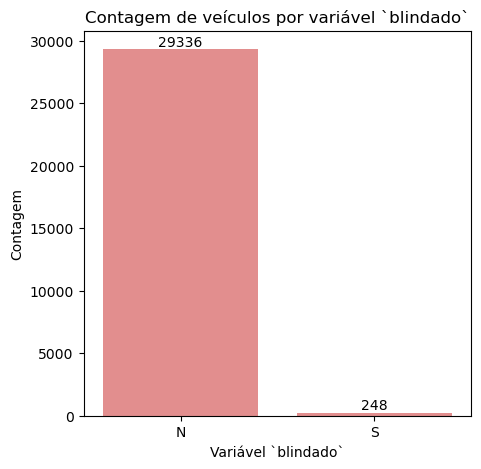

In [852]:
# Variável `blindado`

# Nulos
print(f'Número de nulos da variável `blindado`: {df.blindado.isna().sum()}')

# Contagem
display(
    df.value_counts('blindado').to_frame().T
)

plt.figure(figsize=(5, 5))
ax = sns.countplot(df, x='blindado', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.xlabel('Variável `blindado`')
plt.ylabel('Contagem')
plt.title('Contagem de veículos por variável `blindado`')
plt.show()

Vamos apenas substituir a variável para booleana, onde N: False e S: True.

In [853]:
df['blindado'] = df.blindado.map({'N': False, 'S': True})

In [854]:
agg_preco(df, 'blindado')

,count,sum,mean,std,min,max
blindado,,,,,,
False,29336,3883061168.730000,132365.050000,80800.070000,9869.950000,1359812.890000
True,248,52317293.650000,210956.830000,131125.660000,37388.930000,676721.300000


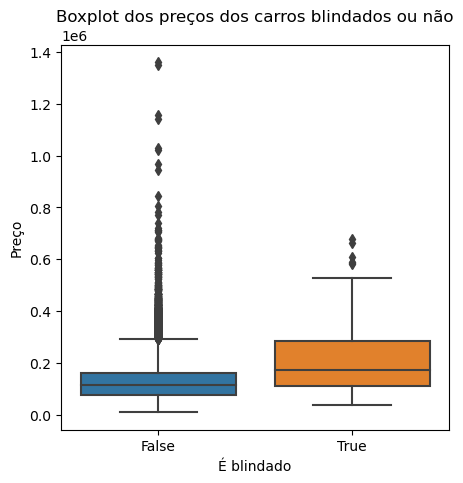

In [855]:
plt.figure(figsize=(5, 5))
sns.boxplot(df, x='blindado', y='preco')
plt.xlabel('É blindado')
plt.ylabel('Preço')
plt.title('Boxplot dos preços dos carros blindados ou não')
plt.show()

Esperava-se que carros blindados fossem mais caros e, em geral, são realmente mais caros.

### cor

In [856]:
# Variável `cor`

# Nulos
print(f'Número de nulos da variável `cor`: {df.cor.isna().sum()}')

# Contagem
display(
    df.value_counts('cor').to_frame().T
)

Número de nulos da variável `cor`: 0


cor,Branco,Preto,Prata,Cinza,Dourado,Verde,Vermelho
0,20949,5256,1741,1634,2,1,1


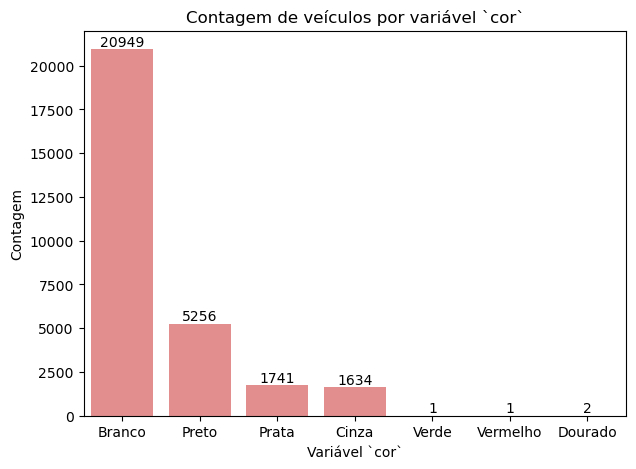

In [857]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(df, x='cor', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.xlabel('Variável `cor`')
plt.ylabel('Contagem')
plt.title('Contagem de veículos por variável `cor`')
plt.show()

Curiosamente, pouquíssimos carros coloridos.

In [858]:
agg_preco(df, 'cor')

,count,sum,mean,std,min,max
cor,,,,,,
Branco,20949,2726714751.770000,130159.660000,74792.760000,14011.650000,1359812.890000
Preto,5256,719773724.080000,136943.250000,103635.890000,11606.400000,1154360.170000
Cinza,1634,322040446.210000,197087.180000,82219.850000,63561.510000,486869.600000
Prata,1741,166555368.020000,95666.500000,43005.520000,9869.950000,203786.370000
Dourado,2,177456.720000,88728.360000,4329.450000,85666.980000,91789.740000
Verde,1,60668.800000,60668.800000,nan,60668.800000,60668.800000
Vermelho,1,56046.780000,56046.780000,nan,56046.780000,56046.780000


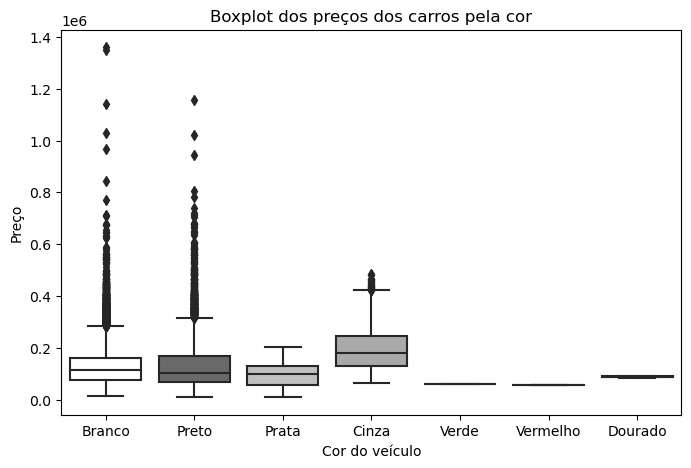

In [859]:
plt.figure(figsize=(8, 5))
sns.boxplot(df, x='cor', y='preco', palette=['white', 'dimgray', 'silver', 'darkgray', 'green', 'red', 'gold'])
plt.xlabel('Cor do veículo')
plt.ylabel('Preço')
plt.title('Boxplot dos preços dos carros pela cor')
plt.show()

### tipo_vendedor

In [860]:
# Variável `tipo_vendedor`

# Nulos
print(f'Número de nulos da variável `tipo_vendedor`: {df.tipo_vendedor.isna().sum()}')

# Contagem
display(
    df.value_counts('tipo_vendedor').to_frame().T
)

Número de nulos da variável `tipo_vendedor`: 0


tipo_vendedor,PF,PJ
0,17926,11658


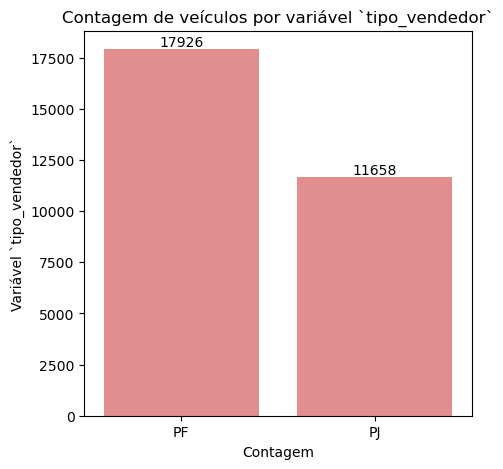

In [861]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(df, x='tipo_vendedor', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.ylabel('Variável `tipo_vendedor`')
plt.xlabel('Contagem')
plt.title('Contagem de veículos por variável `tipo_vendedor`')
plt.show()

Vamos transformar essa coluna em booleana e para isso renomearemos também a coluna para `vendedor_PJ`.

In [862]:
df['tipo_vendedor'] = df.tipo_vendedor.map({'PJ': True, 'PF': False})
df.rename(columns={'tipo_vendedor':'vendedor_PJ'}, inplace=True)

In [863]:
agg_preco(df, 'vendedor_PJ')

,count,sum,mean,std,min,max
vendedor_PJ,,,,,,
False,17926,2490229755.230000,138917.200000,84095.570000,9869.950000,1154360.170000
True,11658,1445148707.150000,123961.980000,76901.230000,13642.890000,1359812.890000


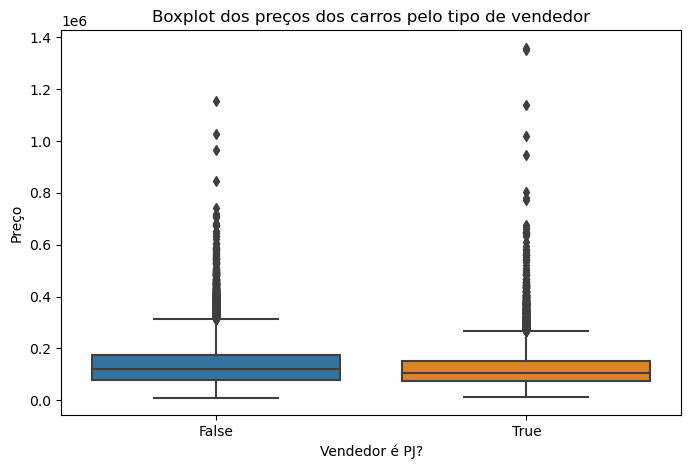

In [864]:
plt.figure(figsize=(8, 5))
sns.boxplot(df, x='vendedor_PJ', y='preco')
plt.xlabel('Vendedor é PJ?')
plt.ylabel('Preço')
plt.title('Boxplot dos preços dos carros pelo tipo de vendedor')
plt.show()

Esperava-se que vendedores PJ vendessem mais caro que os PFs, porém o contrário ocorreu.

### cidade_vendedor e estado_vendedor

In [865]:
# Variável `cidade_vendedor`

# Nulos
print(f'Número de nulos da variável `cidade_vendedor`: {df.cidade_vendedor.isna().sum()}')

print('-'*64)

print('Top 10 cidades com mais vendas')
display(
    df.value_counts('cidade_vendedor').to_frame().head(10)
)

Número de nulos da variável `cidade_vendedor`: 0
----------------------------------------------------------------
Top 10 cidades com mais vendas


,0
cidade_vendedor,
São Paulo,6158
Rio de Janeiro,5793
Belo Horizonte,2172
Presidente Prudente,1536
Goiânia,1396
Medianeira,1197
Campinas,828
São José do Rio Preto,768
Porto Alegre,662


In [866]:
# Variável `estado_vendedor`

# Nulos
print(f'Número de nulos da variável `estado_vendedor`: {df.estado_vendedor.isna().sum()}')

print('-'*64)

print('Top 10 estados com mais vendas')

# Contagem
display(
    df.value_counts('estado_vendedor').to_frame().head(10)
)

Número de nulos da variável `estado_vendedor`: 0
----------------------------------------------------------------
Top 10 estados com mais vendas


,0
estado_vendedor,
São Paulo (SP),16378
Rio de Janeiro (RJ),2548
Paraná (PR),2526
Santa Catarina (SC),2302
Minas Gerais (MG),1775
Rio Grande do Sul (RS),1646
Goiás (GO),789
Bahia (BA),604
Pernambuco (PE),318


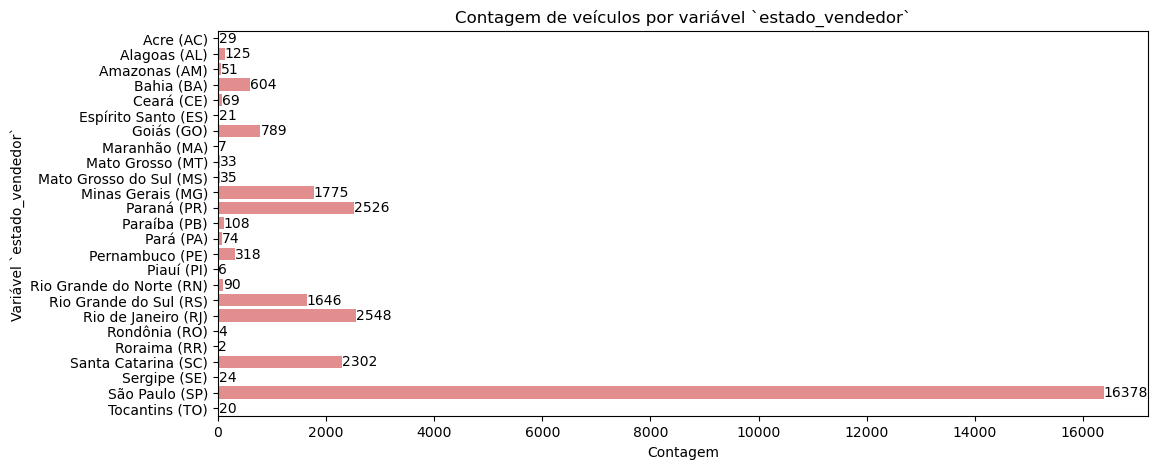

In [867]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(df.sort_values('estado_vendedor'), y='estado_vendedor', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.ylabel('Variável `estado_vendedor`')
plt.xlabel('Contagem')
plt.title('Contagem de veículos por variável `estado_vendedor`')
plt.show()

In [868]:
# Agrupando as principais estatísticas por estado
agg_preco(df, 'estado_vendedor')

,count,sum,mean,std,min,max
estado_vendedor,,,,,,
São Paulo (SP),16378,2125155114.630000,129756.690000,82498.280000,11606.400000,1154360.170000
Paraná (PR),2526,367439545.100000,145463.000000,80845.470000,18525.080000,643743.120000
Rio de Janeiro (RJ),2548,343877627.890000,134959.820000,80460.250000,14302.710000,683272.720000
Santa Catarina (SC),2302,309486913.810000,134442.620000,84432.110000,9869.950000,1359812.890000
Minas Gerais (MG),1775,239415444.200000,134881.940000,76833.900000,14464.690000,653173.280000
Rio Grande do Sul (RS),1646,232787858.410000,141426.400000,82420.790000,18394.090000,845191.660000
Goiás (GO),789,121045293.330000,153416.090000,89247.880000,30259.720000,1349747.710000
Bahia (BA),604,78088582.890000,129285.730000,74953.130000,26838.810000,466067.890000
Pernambuco (PE),318,37246223.310000,117126.490000,62761.800000,29624.190000,359493.700000


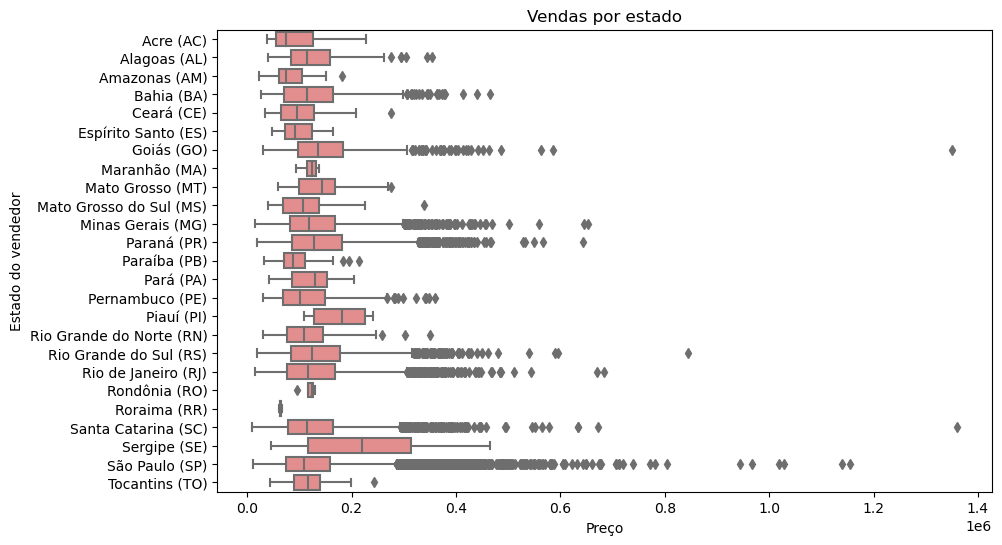

In [869]:
plt.figure(figsize=(10, 6))
sns.boxplot(df.sort_values('estado_vendedor'), y='estado_vendedor', x='preco', color='lightcoral')
plt.xlabel('Preço')
plt.ylabel('Estado do vendedor')
plt.title('Vendas por estado')
plt.show()

O melhor estado para se comprar um veículo aparentemente seria Roraima, visto que é o estado que em média tem os menores valores. Contudo, esse valor é mascarado pelo fato de que o estado possui apenas duas vendas realizadas.

Dessa maneira, um outro estado que também apresenta veículos mais baratos seria o Amazonas, que efetuou 51 vendas.

De maneira análoga, se fossemos escolher um estado para realizar a venda de um veículo de maneira que o preço seja o maior possível, a escolha seria, pela média, o Sergipe. Contudo, podemos verificar também que é o estado que apresenta o maior desvio padrão, o que indica que os preços de seus veículos estão muito dispersos.

Outras sugestões de estados com preços mais elevados incluem o Mato Grosso e Goiás, que respectivamente tinham as maiores medianas e médias dos preços dos veículos.

### anunciante

In [870]:
agg_preco(df, 'anunciante')

,count,sum,mean,std,min,max
anunciante,,,,,,
Pessoa Física,17999,2499610399.850000,138874.960000,84089.890000,9869.950000,1154360.170000
Loja,9879,1210197357.240000,122502.010000,78142.250000,13642.890000,1359812.890000
Concessionária,1702,225256305.310000,132348.010000,68477.990000,29624.190000,563706.680000
Acessórios e serviços para autos,4,314399.980000,78599.990000,25415.050000,42554.540000,101221.940000


Número de nulos da variável `anunciante`: 0


anunciante,Pessoa Física,Loja,Concessionária,Acessórios e serviços para autos
0,17999,9879,1702,4


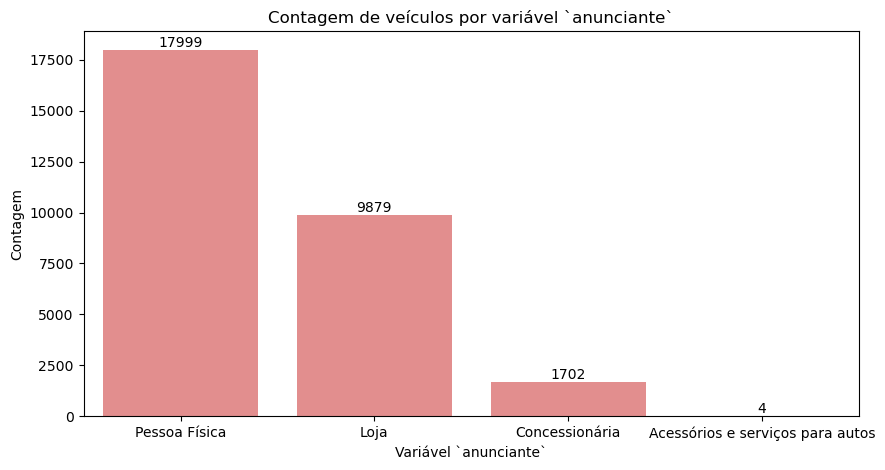

In [871]:
# Variável `anunciante`

# Nulos
print(f'Número de nulos da variável `anunciante`: {df.anunciante.isna().sum()}')

# Contagem
display(
    df.value_counts('anunciante').to_frame().T
)

plt.figure(figsize=(10, 5))
ax = sns.countplot(df, x='anunciante', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.xlabel('Variável `anunciante`')
plt.ylabel('Contagem')
plt.title('Contagem de veículos por variável `anunciante`')
plt.show()

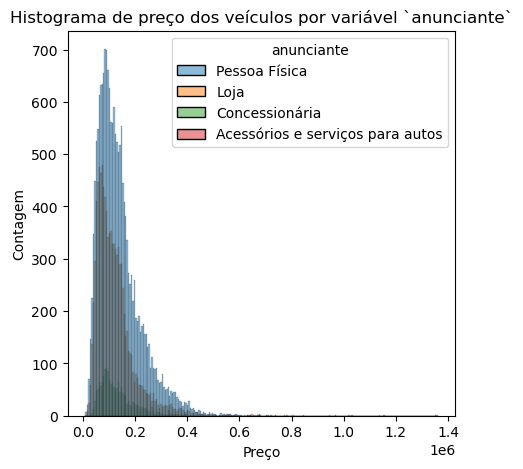

In [872]:
plt.figure(figsize=(5, 5))
ax = sns.histplot(df, x='preco', hue='anunciante')
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.title('Histograma de preço dos veículos por variável `anunciante`')
plt.show()

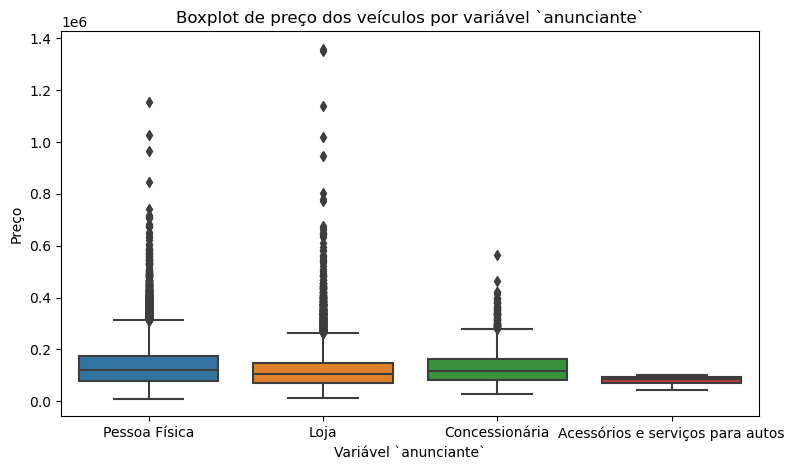

In [873]:
plt.figure(figsize=(9, 5))
ax = sns.boxplot(df, y='preco', x='anunciante')
plt.xlabel('Variável `anunciante`')
plt.ylabel('Preço')
plt.title('Boxplot de preço dos veículos por variável `anunciante`')
plt.show()

### entrega_delivery

In [874]:
# Variável `entrega_delivery`

# Nulos
print(f'Número de nulos da variável `entrega_delivery`: {df.entrega_delivery.isna().sum()}')

# Contagem
display(
    df.value_counts('entrega_delivery').to_frame().T
)

Número de nulos da variável `entrega_delivery`: 0


entrega_delivery,False,True
0,23601,5983


In [875]:
agg_preco(df, 'entrega_delivery')

,count,sum,mean,std,min,max
entrega_delivery,,,,,,
False,23601,3204926326.940000,135796.210000,81989.520000,9869.950000,1349747.710000
True,5983,730452135.440000,122087.940000,79429.870000,13642.890000,1359812.890000


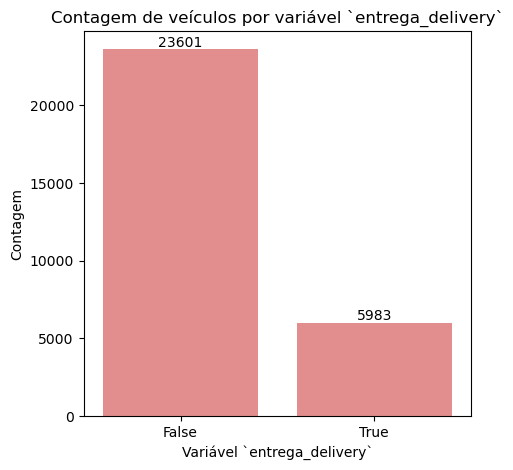

In [876]:

plt.figure(figsize=(5, 5))
ax = sns.countplot(df, x='entrega_delivery', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.xlabel('Variável `entrega_delivery`')
plt.ylabel('Contagem')
plt.title('Contagem de veículos por variável `entrega_delivery`')
plt.show()

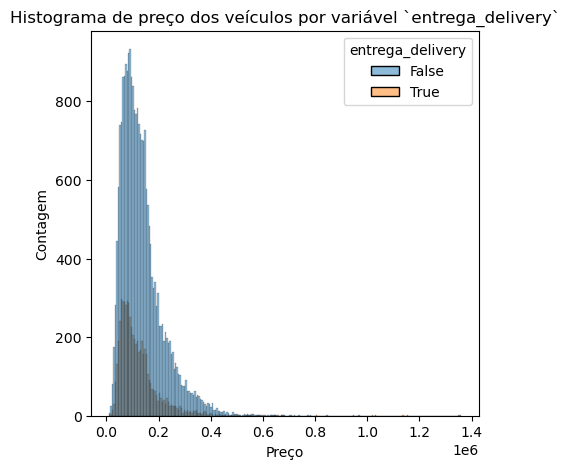

In [877]:
plt.figure(figsize=(5, 5))
ax = sns.histplot(df, x='preco', hue='entrega_delivery')
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.title('Histograma de preço dos veículos por variável `entrega_delivery`')
plt.show()

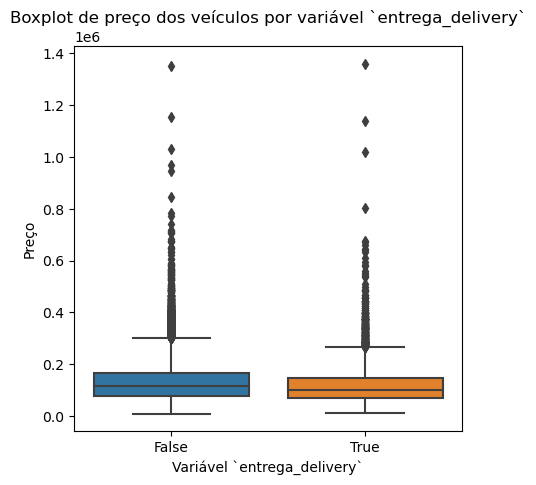

In [878]:
plt.figure(figsize=(5, 5))
ax = sns.boxplot(df, y='preco', x='entrega_delivery')
plt.xlabel('Variável `entrega_delivery`')
plt.ylabel('Preço')
plt.title('Boxplot de preço dos veículos por variável `entrega_delivery`')
plt.show()

### troca

In [879]:
# Variável `troca`

# Nulos
print(f'Número de nulos da variável `troca`: {df.troca.isna().sum()}')

# Contagem
display(
    df.value_counts('troca').to_frame().T
)

Número de nulos da variável `troca`: 0


troca,False,True
0,24523,5061


In [880]:
agg_preco(df, 'troca')

,count,sum,mean,std,min,max
troca,,,,,,
False,24523,3310765416.530000,135006.540000,81465.470000,9869.950000,1349747.710000
True,5061,624613045.850000,123416.920000,81944.130000,13642.890000,1359812.890000


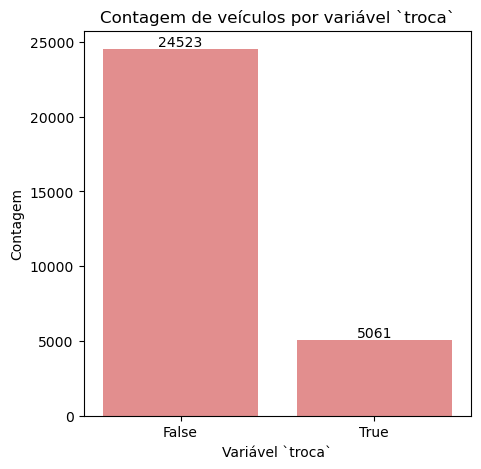

In [881]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(df, x='troca', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.xlabel('Variável `troca`')
plt.ylabel('Contagem')
plt.title('Contagem de veículos por variável `troca`')
plt.show()

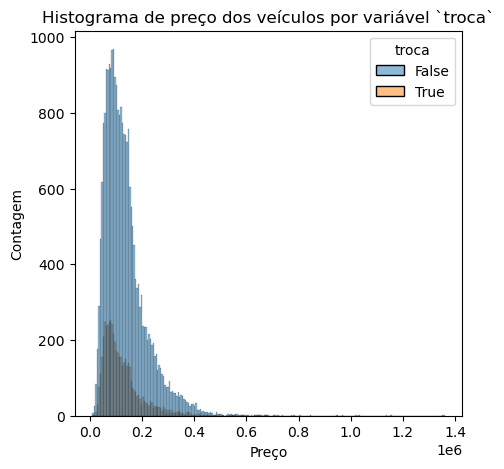

In [882]:
plt.figure(figsize=(5, 5))
ax = sns.histplot(df, x='preco', hue='troca')
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.title('Histograma de preço dos veículos por variável `troca`')
plt.show()

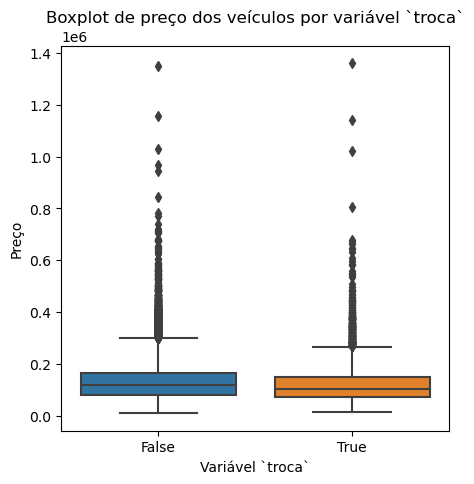

In [883]:
plt.figure(figsize=(5, 5))
ax = sns.boxplot(df, y='preco', x='troca')
plt.xlabel('Variável `troca`')
plt.ylabel('Preço')
plt.title('Boxplot de preço dos veículos por variável `troca`')
plt.show()

### elegivel_revisao

In [884]:
# Variável `elegivel_revisao`

# Nulos
print(f'Número de nulos da variável `elegivel_revisao`: {df.elegivel_revisao.isna().sum()}')

# Contagem
display(
    df.value_counts('elegivel_revisao').to_frame().T
)

Número de nulos da variável `elegivel_revisao`: 0


elegivel_revisao,False
0,29584


Nenhum veículo estava elegível para revisão.

### dono_aceita_troca

In [885]:
# Variável `dono_aceita_troca`

# Nulos
print(f'Número de nulos da variável `dono_aceita_troca`: {df.dono_aceita_troca.isna().sum()}')

# Contagem
display(
    df.value_counts('dono_aceita_troca').to_frame().T
)

Número de nulos da variável `dono_aceita_troca`: 7662


dono_aceita_troca,Aceita troca
0,21922


In [886]:
# Trocando a varíavel para booleana
df['dono_aceita_troca'] = df.dono_aceita_troca.notnull()

In [887]:
agg_preco(df, 'dono_aceita_troca')

,count,sum,mean,std,min,max
dono_aceita_troca,,,,,,
True,21922,3002096187.940000,136944.450000,85814.900000,9869.950000,1359812.890000
False,7662,933282274.450000,121806.610000,67157.610000,11606.400000,634313.010000


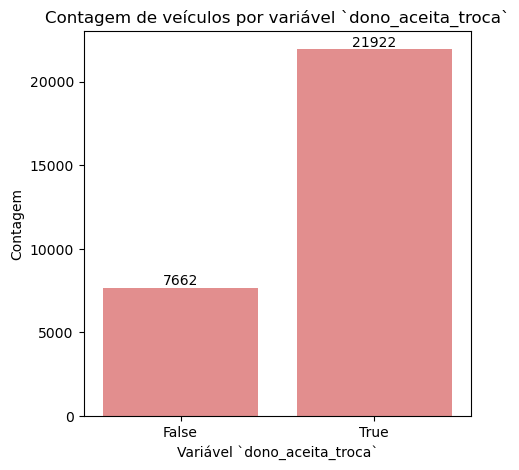

In [888]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(df, x='dono_aceita_troca', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.xlabel('Variável `dono_aceita_troca`')
plt.ylabel('Contagem')
plt.title('Contagem de veículos por variável `dono_aceita_troca`')
plt.show()

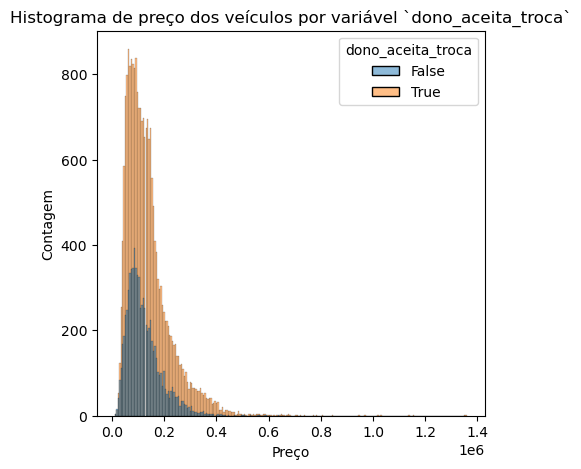

In [889]:
plt.figure(figsize=(5, 5))
ax = sns.histplot(df, x='preco', hue='dono_aceita_troca')
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.title('Histograma de preço dos veículos por variável `dono_aceita_troca`')
plt.show()

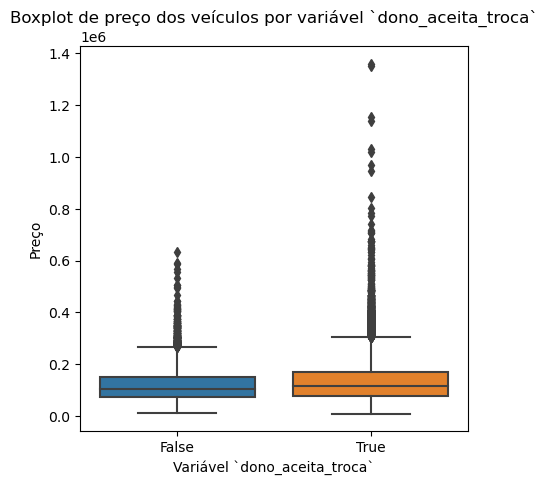

In [890]:
plt.figure(figsize=(5, 5))
ax = sns.boxplot(df, y='preco', x='dono_aceita_troca')
plt.xlabel('Variável `dono_aceita_troca`')
plt.ylabel('Preço')
plt.title('Boxplot de preço dos veículos por variável `dono_aceita_troca`')
plt.show()

### veiculo_único_dono

In [891]:
# Variável `veiculo_único_dono`

# Nulos
print(f'Número de nulos da variável `veiculo_único_dono`: {df.veiculo_único_dono.isna().sum()}')

# Contagem
display(
    df.value_counts('veiculo_único_dono').to_frame().T
)

Número de nulos da variável `veiculo_único_dono`: 19161


veiculo_único_dono,Único dono
0,10423


In [892]:
# Trocando a varíavel para booleana
df['veiculo_único_dono'] = df.veiculo_único_dono.notnull()

In [893]:
df.groupby('veiculo_único_dono') \
    .agg({'preco': ['count', 'mean', 'median', 'std']}) \
    .preco.style.apply(highlight_max)

,count,mean,median,std
veiculo_único_dono,,,,
False,19161,128559.986683,106966.355424,84655.561853
True,10423,141230.025669,125767.859016,75169.334800


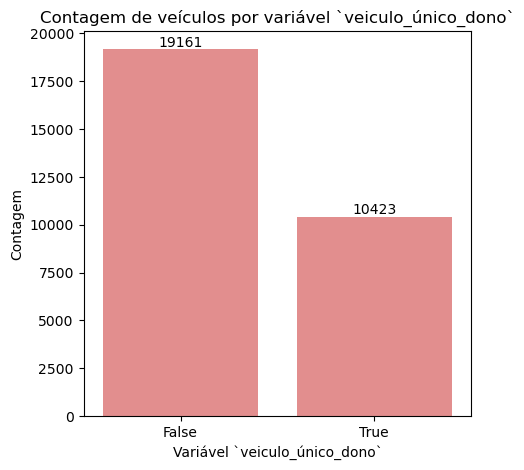

In [894]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(df, x='veiculo_único_dono', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.xlabel('Variável `veiculo_único_dono`')
plt.ylabel('Contagem')
plt.title('Contagem de veículos por variável `veiculo_único_dono`')
plt.show()

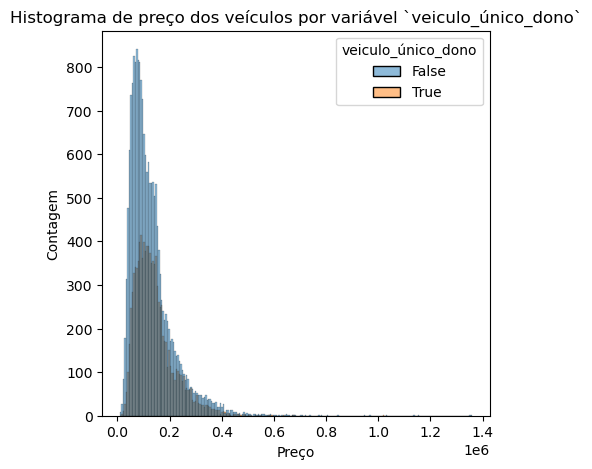

In [895]:
plt.figure(figsize=(5, 5))
ax = sns.histplot(df, x='preco', hue='veiculo_único_dono')
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.title('Histograma de preço dos veículos por variável `veiculo_único_dono`')
plt.show()

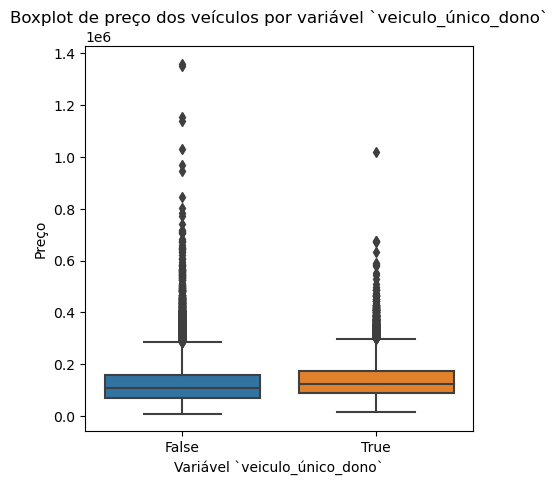

In [896]:
plt.figure(figsize=(5, 5))
ax = sns.boxplot(df, y='preco', x='veiculo_único_dono')
plt.xlabel('Variável `veiculo_único_dono`')
plt.ylabel('Preço')
plt.title('Boxplot de preço dos veículos por variável `veiculo_único_dono`')
plt.show()

### revisoes_concessionaria

In [897]:
# Variável `revisoes_concessionaria`

# Nulos
print(f'Número de nulos da variável `revisoes_concessionaria`: {df.revisoes_concessionaria.isna().sum()}')

# Contagem
display(
    df.value_counts('revisoes_concessionaria').to_frame().T
)


Número de nulos da variável `revisoes_concessionaria`: 20412


revisoes_concessionaria,Todas as revisões feitas pela concessionária
0,9172


In [898]:
# Trocando a varíavel para booleana
df['revisoes_concessionaria'] = df.revisoes_concessionaria.notnull()

In [899]:
df.groupby('revisoes_concessionaria') \
    .agg({'preco': ['count', 'mean', 'median', 'std']}) \
    .preco.style.apply(highlight_max)

,count,mean,median,std
revisoes_concessionaria,,,,
False,20412,123207.729899,105427.457768,76450.153810
True,9172,154869.415578,136218.519048,88386.359654


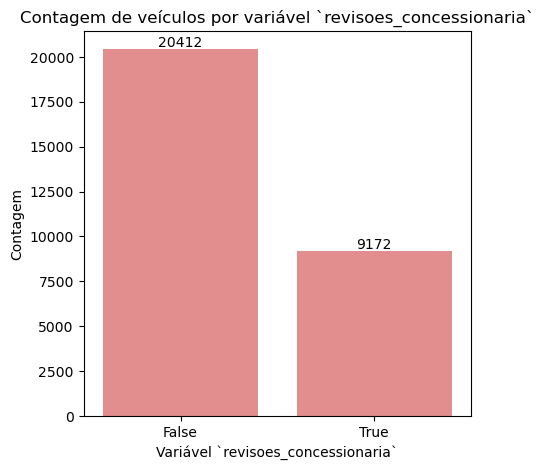

In [900]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(df, x='revisoes_concessionaria', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.xlabel('Variável `revisoes_concessionaria`')
plt.ylabel('Contagem')
plt.title('Contagem de veículos por variável `revisoes_concessionaria`')
plt.show()

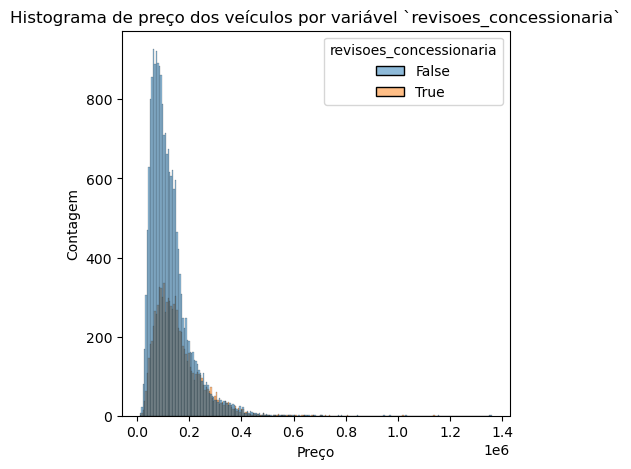

In [901]:
plt.figure(figsize=(5, 5))
ax = sns.histplot(df, x='preco', hue='revisoes_concessionaria')
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.title('Histograma de preço dos veículos por variável `revisoes_concessionaria`')
plt.show()

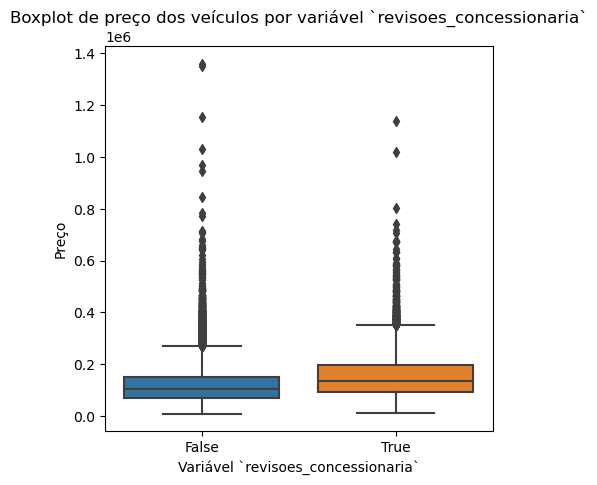

In [902]:
plt.figure(figsize=(5, 5))
ax = sns.boxplot(df, y='preco', x='revisoes_concessionaria')
plt.xlabel('Variável `revisoes_concessionaria`')
plt.ylabel('Preço')
plt.title('Boxplot de preço dos veículos por variável `revisoes_concessionaria`')
plt.show()

### ipva_pago

In [903]:
# Variável `ipva_pago`

# Nulos
print(f'Número de nulos da variável `ipva_pago`: {df.ipva_pago.isna().sum()}')

# Contagem
display(
    df.value_counts('ipva_pago').to_frame().T
)

Número de nulos da variável `ipva_pago`: 9925


ipva_pago,IPVA pago
0,19659


In [904]:
# Trocando a varíavel para booleana
df['ipva_pago'] = df.ipva_pago.notnull()

In [905]:
df.groupby('ipva_pago') \
    .agg({'preco': ['count', 'mean', 'median', 'std']}) \
    .preco.style.apply(highlight_max)

,count,mean,median,std
ipva_pago,,,,
False,9925,134180.535465,110141.626520,89237.267030
True,19659,132439.933257,116127.098683,77554.234135


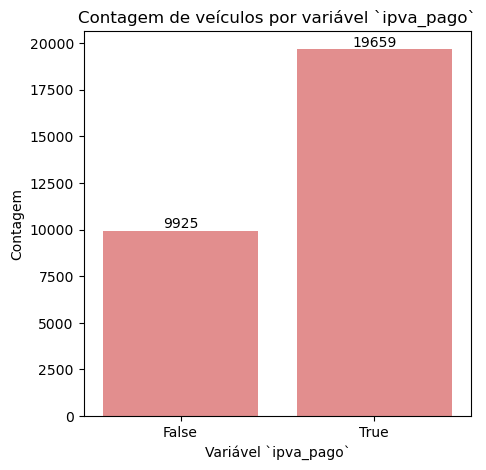

In [906]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(df, x='ipva_pago', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.xlabel('Variável `ipva_pago`')
plt.ylabel('Contagem')
plt.title('Contagem de veículos por variável `ipva_pago`')
plt.show()

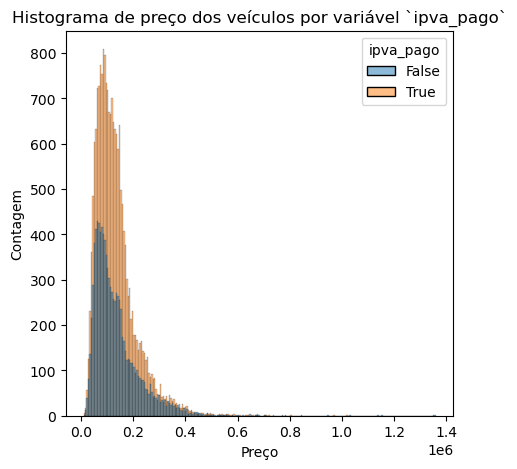

In [907]:
plt.figure(figsize=(5, 5))
ax = sns.histplot(df, x='preco', hue='ipva_pago')
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.title('Histograma de preço dos veículos por variável `ipva_pago`')
plt.show()

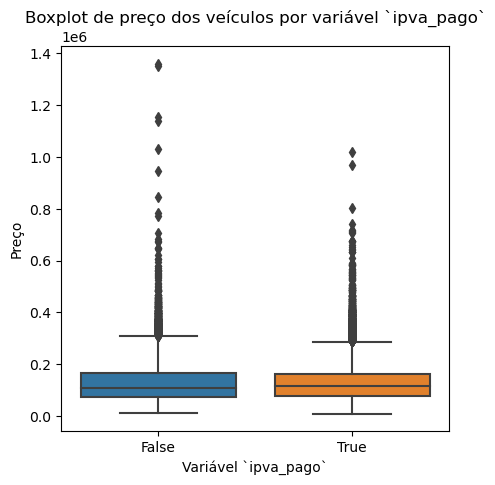

In [908]:
plt.figure(figsize=(5, 5))
ax = sns.boxplot(df, y='preco', x='ipva_pago')
plt.xlabel('Variável `ipva_pago`')
plt.ylabel('Preço')
plt.title('Boxplot de preço dos veículos por variável `ipva_pago`')
plt.show()

### veiculo_licenciado

In [909]:
# Variável `veiculo_licenciado`

# Nulos
print(f'Número de nulos da variável `veiculo_licenciado`: {df.veiculo_licenciado.isna().sum()}')

# Contagem
display(
    df.value_counts('veiculo_licenciado').to_frame().T
)

Número de nulos da variável `veiculo_licenciado`: 13678


veiculo_licenciado,Licenciado
0,15906


In [910]:
# Trocando a varíavel para booleana
df['veiculo_licenciado'] = df.veiculo_licenciado.notnull()

In [911]:
df.groupby('veiculo_licenciado') \
    .agg({'preco': ['count', 'mean', 'median', 'std']}) \
    .preco.style.apply(highlight_max)

,count,mean,median,std
veiculo_licenciado,,,,
False,13678,134422.188420,111318.815836,87877.582345
True,15906,131821.436513,116353.816979,75895.112850


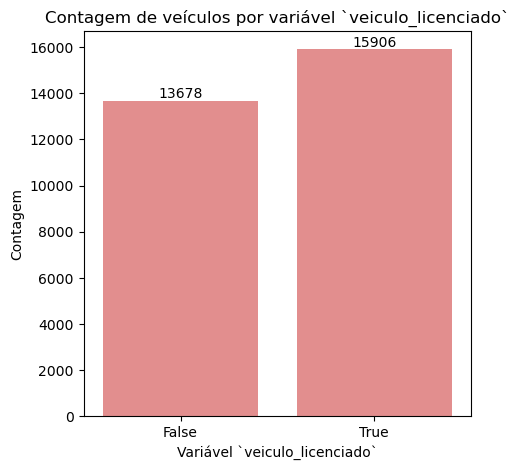

In [912]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(df, x='veiculo_licenciado', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.xlabel('Variável `veiculo_licenciado`')
plt.ylabel('Contagem')
plt.title('Contagem de veículos por variável `veiculo_licenciado`')
plt.show()

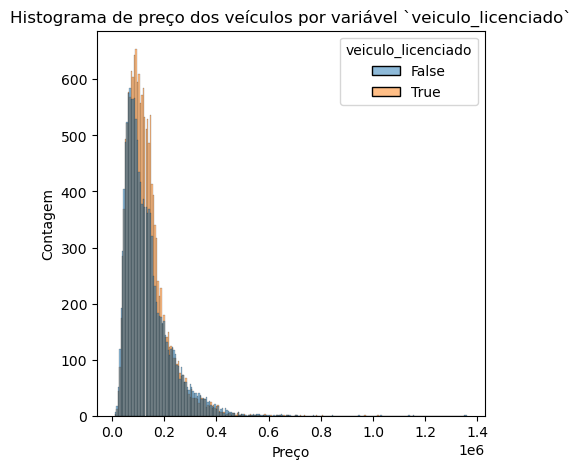

In [913]:
plt.figure(figsize=(5, 5))
ax = sns.histplot(df, x='preco', hue='veiculo_licenciado')
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.title('Histograma de preço dos veículos por variável `veiculo_licenciado`')
plt.show()

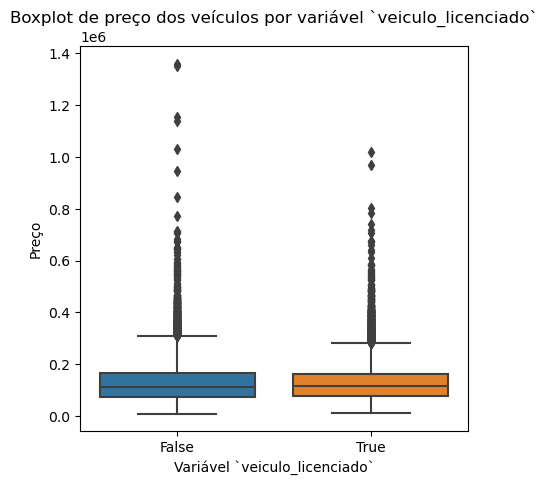

In [914]:
plt.figure(figsize=(5, 5))
ax = sns.boxplot(df, y='preco', x='veiculo_licenciado')
plt.xlabel('Variável `veiculo_licenciado`')
plt.ylabel('Preço')
plt.title('Boxplot de preço dos veículos por variável `veiculo_licenciado`')
plt.show()

### garantia_de_fábrica

In [915]:
# Variável `garantia_de_fábrica`

# Nulos
print(f'Número de nulos da variável `garantia_de_fábrica`: {df.garantia_de_fábrica.isna().sum()}')

# Contagem
display(
    df.value_counts('garantia_de_fábrica').to_frame().T
)

Número de nulos da variável `garantia_de_fábrica`: 25219


garantia_de_fábrica,Garantia de fábrica
0,4365


In [916]:
# Trocando a varíavel para booleana
df['garantia_de_fábrica'] = df.garantia_de_fábrica.notnull()

In [917]:
df.groupby('garantia_de_fábrica') \
    .agg({'preco': ['count', 'mean', 'median', 'std']}) \
    .preco.style.apply(highlight_max)

,count,mean,median,std
garantia_de_fábrica,,,,
False,25219,126798.184924,108545.015442,79534.901258
True,4365,168993.135573,148528.910604,84465.960948


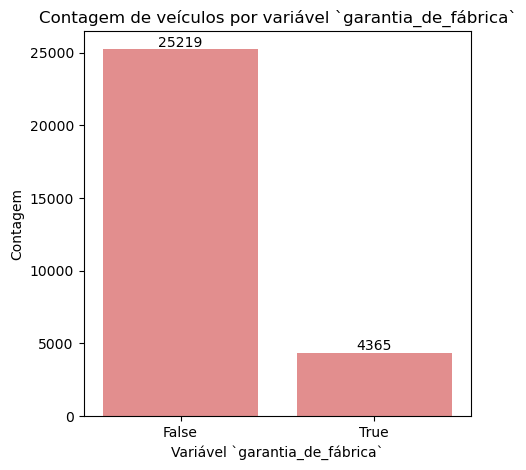

In [918]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(df, x='garantia_de_fábrica', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.xlabel('Variável `garantia_de_fábrica`')
plt.ylabel('Contagem')
plt.title('Contagem de veículos por variável `garantia_de_fábrica`')
plt.show()

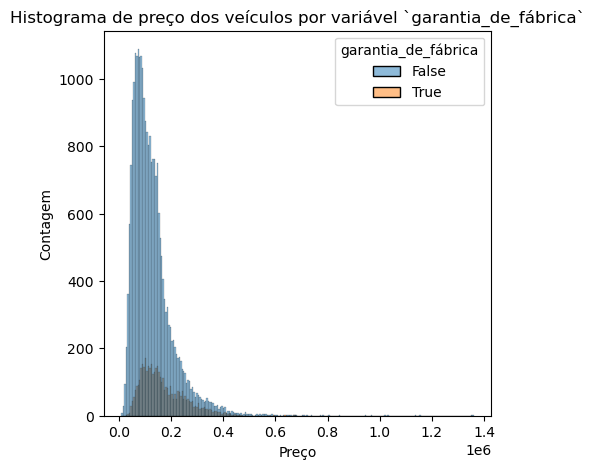

In [919]:
plt.figure(figsize=(5, 5))
ax = sns.histplot(df, x='preco', hue='garantia_de_fábrica')
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.title('Histograma de preço dos veículos por variável `garantia_de_fábrica`')
plt.show()

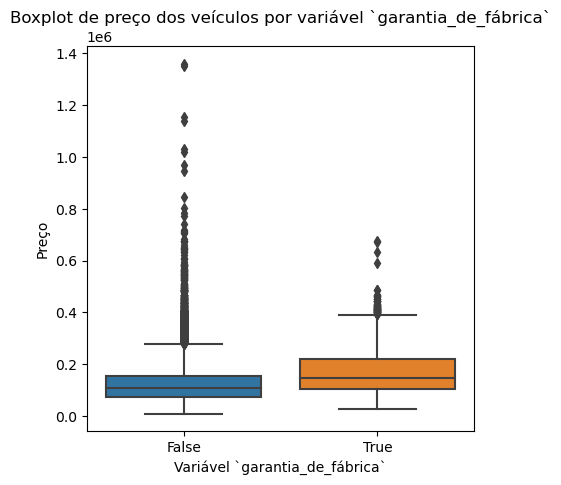

In [920]:
plt.figure(figsize=(5, 5))
ax = sns.boxplot(df, y='preco', x='garantia_de_fábrica')
plt.xlabel('Variável `garantia_de_fábrica`')
plt.ylabel('Preço')
plt.title('Boxplot de preço dos veículos por variável `garantia_de_fábrica`')
plt.show()

### revisoes_dentro_agenda

In [921]:
# Variável `revisoes_dentro_agenda`

# Nulos
print(f'Número de nulos da variável `revisoes_dentro_agenda`: {df.revisoes_dentro_agenda.isna().sum()}')

# Contagem
display(
    df.value_counts('revisoes_dentro_agenda').to_frame().T
)

Número de nulos da variável `revisoes_dentro_agenda`: 23674


revisoes_dentro_agenda,Todas as revisões feitas pela agenda do carro
0,5910


In [922]:
# Trocando a varíavel para booleana
df['revisoes_dentro_agenda'] = df.revisoes_dentro_agenda.notnull()

In [923]:
df.groupby('revisoes_dentro_agenda') \
    .agg({'preco': ['count', 'mean', 'median', 'std']}) \
    .preco.style.apply(highlight_max)

,count,mean,median,std
revisoes_dentro_agenda,,,,
False,23674,128264.417179,109732.828873,79557.260682
True,5910,152089.111689,134597.274873,87038.190591


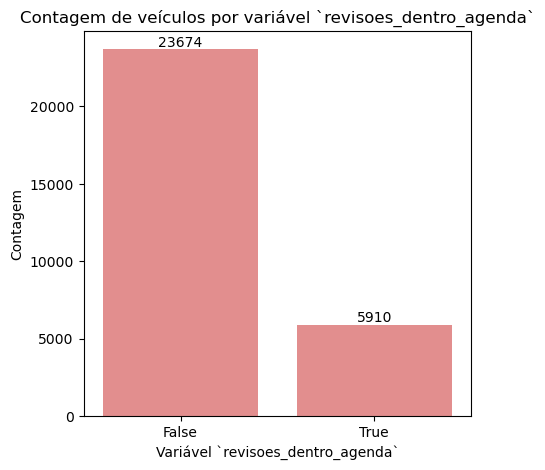

In [924]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(df, x='revisoes_dentro_agenda', color='lightcoral')
ax.bar_label(ax.containers[0])
plt.xlabel('Variável `revisoes_dentro_agenda`')
plt.ylabel('Contagem')
plt.title('Contagem de veículos por variável `revisoes_dentro_agenda`')
plt.show()

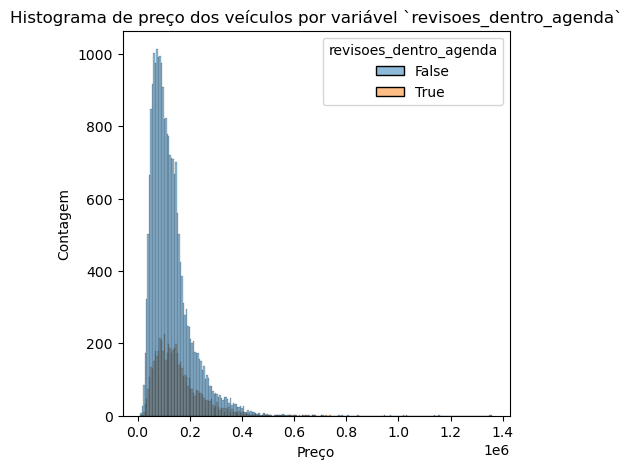

In [925]:
plt.figure(figsize=(5, 5))
ax = sns.histplot(df, x='preco', hue='revisoes_dentro_agenda')
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.title('Histograma de preço dos veículos por variável `revisoes_dentro_agenda`')
plt.show()

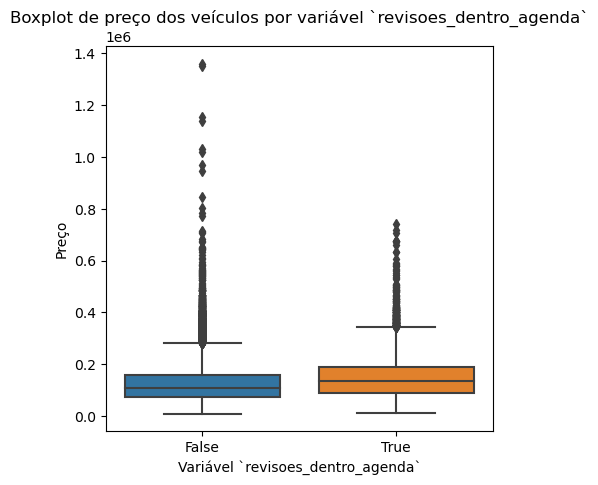

In [926]:
plt.figure(figsize=(5, 5))
ax = sns.boxplot(df, y='preco', x='revisoes_dentro_agenda')
plt.xlabel('Variável `revisoes_dentro_agenda`')
plt.ylabel('Preço')
plt.title('Boxplot de preço dos veículos por variável `revisoes_dentro_agenda`')
plt.show()

### veiculo_alienado

In [927]:
# Variável `veiculo_alienado`

# Nulos
print(f'Número de nulos da variável `veiculo_alienado`: {df.veiculo_alienado.isna().sum()}')

# Contagem
display(
    df.value_counts('veiculo_alienado').to_frame().T
)


Número de nulos da variável `veiculo_alienado`: 29584


veiculo_alienado
0


Não há nenhum veículo alienado.

### preco

Número de nulos da variável `preco`: 0


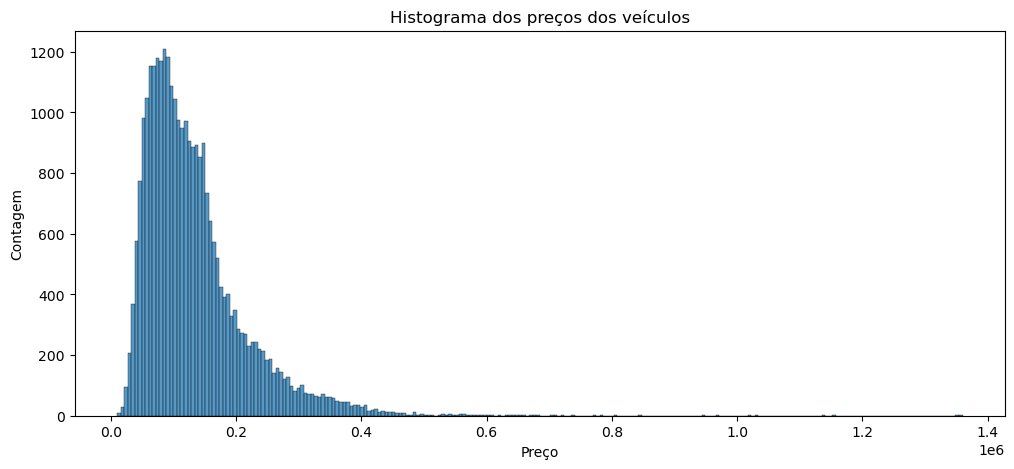

In [1028]:
# Variável `preco`

# Nulos
print(f'Número de nulos da variável `preco`: {df.preco.isna().sum()}')

plt.figure(figsize=(12, 5))
ax = sns.histplot(df, x='preco')
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.title('Histograma dos preços dos veículos')
plt.show()

In [929]:
display(df.sort_values('preco').head())

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,vendedor_PJ,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco,diferenca_ano
3930,301661037804328286615953008015027061532,8,VOLKSWAGEN,FUSCA,1.6 8V GASOLINA 2P MANUAL,1992,2012,222321.0,Manual,4,Sedã,False,Prata,False,Jaguaruna,Santa Catarina (SC),Pessoa Física,False,False,False,True,False,False,True,False,False,False,NaN,9869.950645,20
26359,226619116291182635743624724700616484456,8,PEUGEOT,307,1.6 PRESENCE SEDAN 16V FLEX 4P MANUAL,1998,2012,119731.0,Manual,4,Sedã,False,Preto,False,Osasco,São Paulo (SP),Pessoa Física,False,False,False,False,False,False,True,True,False,False,NaN,11606.398045,14
5497,301737368863860882436657500276489502131,8,PEUGEOT,207,1.4 XR SPORT 8V FLEX 4P MANUAL,1999,2013,128769.0,Manual,4,Hatchback,False,Preto,False,Brotas,São Paulo (SP),Pessoa Física,False,False,False,False,False,True,True,False,False,True,NaN,13576.401422,14
18200,279125074222685494207525095206614870117,15,FIAT,PALIO,1.0 MPI FIRE ECONOMY 8V FLEX 2P MANUAL,2008,2012,138482.0,Manual,4,Picape,False,Prata,True,Rio de Janeiro,São Paulo (SP),Loja,True,True,False,True,False,False,False,False,False,False,NaN,13642.891063,4
16180,72843072145688843461062591189140131966,14,FIAT,STRADA,1.4 MPI WORKING CS 8V FLEX 2P MANUAL,2015,2015,86105.0,Manual,4,Picape,False,Branco,False,Osasco,São Paulo (SP),Pessoa Física,False,False,False,True,False,False,False,False,False,False,NaN,14011.654277,0


In [930]:
display(df.sort_values('preco', ascending=False).head())

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,vendedor_PJ,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco,diferenca_ano
9175,308503071796180546584015995459795952963,13,PORSCHE,911,3.0 24V H6 GASOLINA TARGA 4S PDK,2014,2017,10249.0,Automática,2,Picape,False,Branco,True,Cocalzinho de Goiás,Santa Catarina (SC),Loja,True,True,False,True,False,False,False,False,False,False,NaN,1.359813e+06,3
15111,43158431735708352041169148103055117190,17,LAND ROVER,RANGE ROVER VELAR,3.0 V6 P380 GASOLINA R-DYNAMIC HSE AUTOMÁTICO,2018,2019,6199.0,Automática,4,Utilitário esportivo,False,Branco,True,Goiânia,Goiás (GO),Loja,False,False,False,True,False,False,False,False,False,False,NaN,1.349748e+06,1
2271,80859761199167937486296054000762167416,8,RAM,2500,6.7 I6 TURBO DIESEL LARAMIE CD 4X4 AUTOMÁTICO,2019,2020,10993.0,Automática,4,Picape,False,Preto,False,São Paulo,São Paulo (SP),Pessoa Física,False,False,False,True,False,False,False,False,False,False,NaN,1.154360e+06,1
4844,128068977712443763554635933612117555753,15,PORSCHE,911,3.0 24V H6 GASOLINA TARGA 4 GTS PDK,2019,2019,10058.0,Manual,2,Picape,False,Branco,True,São Paulo,São Paulo (SP),Loja,True,True,False,True,False,True,False,False,False,False,NaN,1.140113e+06,0
21827,155547567848928485806288559744566635721,17,PORSCHE,718,2.0 16V H4 GASOLINA CAYMAN PDK,2015,2015,12667.0,Automática,4,Picape,False,Branco,False,Sorocaba,São Paulo (SP),Pessoa Física,False,False,False,True,False,False,False,False,False,False,NaN,1.028431e+06,0


Em geral, percebe-se que vendedores PJ 

## Perguntas propostas

### Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê? 

Primeiramente, precisamos estabelecer alguns critérios para definir as marcas de carro popular. Parece razóavel definir que seriam as marcas com preços mais baixos e que tenham uma boa quantidade de veículos vendidos.

Vamos agrupar os veículos por marcas e agregar os valores por preço, apresentando a mediana (uma vez que é uma medida que sofre menos influência de outliers) e a contagem de veículos vendidos.

In [1059]:
marcas_populares = df.groupby('marca').agg({'preco': ['count', 'median']}).preco.sort_values('median').reset_index()
marcas_populares.head(10)

,marca,count,median
0,EFFA,1,40163.175829
1,BRM,1,47762.671073
2,CHRYSLER,30,57530.513198
3,CITROËN,194,61708.494392
4,SMART,12,66929.542662
5,ALFA ROMEO,9,69926.750037
6,SSANGYONG,14,73173.086612
7,RENAULT,538,75871.664317
8,DODGE,37,76463.935136
9,HYUNDAI,2043,77118.762163


Como critério para "popularidade" vamos arbitrariamente tomar apenas as marcas com mais de 200 vendas, e selecionar apenas os 10 menores preços:

In [1060]:
display(marcas_populares[marcas_populares['count'] > 200].head(10))

top10_marcas_populares = marcas_populares[marcas_populares['count'] > 200].head(10).marca

,marca,count,median
7,RENAULT,538,75871.664317
9,HYUNDAI,2043,77118.762163
10,CHEVROLET,3020,79934.798236
14,HONDA,1586,91506.027179
15,NISSAN,438,91691.281136
16,FIAT,1918,93202.070187
17,VOLKSWAGEN,4594,103350.092101
18,FORD,1060,103619.715970
22,MITSUBISHI,862,117222.069832
23,KIA,408,118306.655455


Agora vamos selecionar apenas essas marcas e comparar os preços praticados em cada estado.

In [1127]:
df[df.marca.isin(top10_marcas_populares)] \
    .groupby('estado_vendedor') \
    .agg({'preco':['count','mean', 'median', 'std', 'min', 'max']}) \
    .preco.sort_values('median', ascending=False).head(10) \
    .style.apply(highlight_max)

,count,mean,median,std,min,max
estado_vendedor,,,,,,
Piauí (PI),5,190915.177367,216911.669785,52651.102796,121851.575810,240243.176208
Mato Grosso (MT),13,157018.833917,151668.104816,73833.372366,59040.523844,276335.895881
Maranhão (MA),3,131409.088091,132147.493043,6699.864231,124370.609094,137709.162135
Rondônia (RO),3,126251.724025,124944.374446,2935.632422,124196.881596,129613.916033
Alagoas (AL),91,116743.592287,111000.653518,52892.433617,39477.019067,261985.267235
Goiás (GO),397,123433.359126,108714.487224,59931.908449,30259.720035,586482.460906
Sergipe (SE),7,138379.742270,107977.590744,119572.701842,44862.086264,362349.952794
Tocantins (TO),12,112045.099468,105092.431438,60474.289648,43722.062552,243002.217032
Paraná (PR),1261,115438.626341,101659.181500,61899.916245,18525.084443,429236.244325


Podemos utilizar os boxplots abaixo para avaliar os estados. Basta verificar quão à direita a linha central do boxplot (que representa a mediana) está localizada no eixo x.

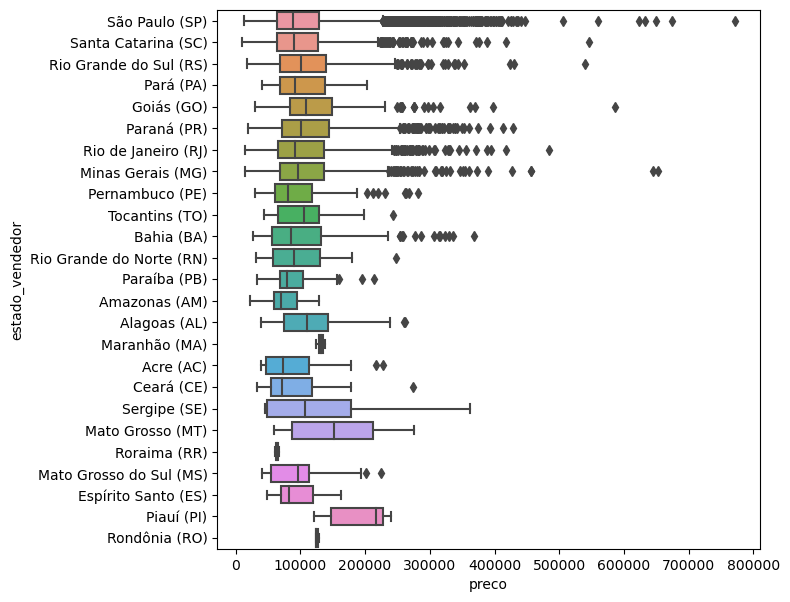

In [1110]:
plt.figure(figsize=(7, 7))
sns.boxplot(df[df.marca.isin(top10_marcas_populares)], y='estado_vendedor', x='preco')
plt.show()

O estado com a maior média de preço para as marcas populares foi o Piauí. Contudo, devemos nos atentar ao fato de que o mesmo possui apenas 5 vendas, o que é representativamente pouco.

Podemos optar então por vender em Alagoas (91 vendas realizadas das marcas populares) ou em Goiás (397 vendas).

### Qual  o  melhor  estado  para  se  comprar  uma  picape  com  transmissão automática e por quê?

Vamos filtrar apenas as picapes com transmissão automática.

In [1078]:
picapes_automaticas = df[(df.tipo == 'Picape') & (df.cambio == 'Automática')]
picapes_automaticas.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,vendedor_PJ,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,diferenca_ano,preco
3,56862509826849933428086372390159405545,14,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015,85357.0,Automática,4,Picape,False,Branco,True,Sorocaba,São Paulo (SP),Loja,True,True,False,True,False,False,True,True,False,False,NaN,2,123681.358857
48,288950486904285252834098132344068709579,8,VOLKSWAGEN,GOLF,1.4 TSI HIGHLINE 16V GASOLINA 4P AUTOMÁTICO,2013,2015,61472.0,Automática,4,Picape,False,Branco,False,Sorocaba,São Paulo (SP),Pessoa Física,False,False,False,False,False,True,True,True,False,True,NaN,2,86304.702755
61,35429253802991633165448719135914498665,8,FIAT,TORO,1.8 16V EVO FLEX FREEDOM AT6,2017,2017,101623.0,Automática,4,Picape,False,Branco,False,São Paulo,São Paulo (SP),Pessoa Física,False,False,False,True,False,False,False,False,False,False,NaN,0,89522.637708
65,328880961834833259252462744533448193192,16,MINI,COOPER,1.6 S CABRIO 16V TURBO GASOLINA 2P AUTOMÁTICO,2013,2014,1336.0,Automática,2,Picape,False,Branco,False,Santos,São Paulo (SP),Pessoa Física,False,False,False,True,False,False,False,False,False,False,NaN,1,217524.354433
79,46988346268821185308430847707885811630,8,MERCEDES-BENZ,CLS 350,3.5 CGI V6 GASOLINA 4P AUTOMÁTICO,2013,2014,93979.0,Automática,4,Picape,False,Branco,False,Rio de Janeiro,Rio de Janeiro (RJ),Pessoa Física,False,False,False,False,False,True,True,True,False,True,NaN,1,364010.202406


Agora vamos agrupar por estado e verificar qual estado possui os menores preços.

In [1125]:
picapes_automaticas.groupby('estado_vendedor') \
    .agg({'preco': ['count', 'mean', 'median', 'std', 'min', 'max']}) \
    .preco.sort_values('median').style\
    .apply(highlight_min)

,count,mean,median,std,min,max
estado_vendedor,,,,,,
Paraíba (PB),4,93157.035264,94749.617465,15280.821664,73223.791078,109905.115048
Acre (AC),6,145256.693656,140874.296899,67928.510680,56452.605869,228022.077115
Mato Grosso do Sul (MS),5,144700.247621,140939.840926,60465.160895,51084.109261,201950.263985
Rio de Janeiro (RJ),318,181660.344685,158427.721631,84677.479836,26729.716235,486869.600468
São Paulo (SP),1712,188427.484638,163250.712832,105203.461173,15953.204811,1154360.165470
Santa Catarina (SC),283,185848.618546,164922.902158,114099.879173,41524.669174,1359812.892309
Rio Grande do Norte (RN),1,179961.694768,179961.694768,nan,179961.694768,179961.694768
Rio Grande do Sul (RS),198,195251.763134,182066.354685,91456.494604,40222.467536,540419.510242
Minas Gerais (MG),211,195702.914796,183793.340535,92135.235476,58014.160096,653173.284756


Paraíba é o estado com as picapes automáticas mais baratas, contudo foram vendidas apenas 4. Caso necessite-se de um estado com maior número de veículos vendidos poderia se optar pelo Rio de Janeiro, com 318 vendas.

<Axes: xlabel='preco', ylabel='estado_vendedor'>

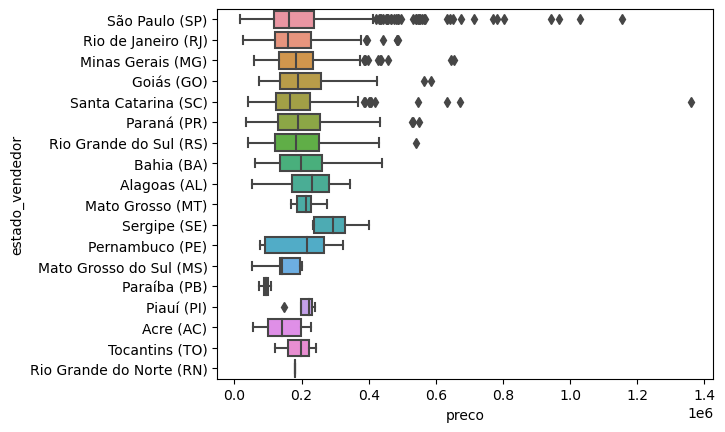

In [1115]:
sns.boxplot(picapes_automaticas, y='estado_vendedor', x='preco')

### Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?

Vamos selecionar apenas os veículos com garantia de fábrica, agrupar por estados e agregar os valores por preço:

In [1133]:
df[df.garantia_de_fábrica == True]\
    .groupby('estado_vendedor') \
    .agg({'preco': ['count', 'mean', 'median', 'std', 'min', 'max']}) \
    .preco.sort_values('median').style.apply(highlight_min)

,count,mean,median,std,min,max
estado_vendedor,,,,,,
Pará (PA),17,98156.615283,87914.540316,40697.738199,43906.629995,169004.077906
Paraíba (PB),1,95762.746630,95762.746630,nan,95762.746630,95762.746630
Amazonas (AM),9,99617.303347,101150.518799,28311.343848,54908.191330,140166.897144
Espírito Santo (ES),9,104030.208116,105139.248966,33632.761297,49919.575982,147312.316884
Mato Grosso do Sul (MS),13,121709.589845,112242.882310,37918.919435,85730.862915,223508.570609
Ceará (CE),1,123939.878795,123939.878795,nan,123939.878795,123939.878795
Rio Grande do Norte (RN),9,133120.393894,132364.271297,77498.786709,54848.887128,302058.400392
Alagoas (AL),58,154268.676544,134200.249180,76038.793890,55178.097786,353250.074635
Minas Gerais (MG),264,161206.273890,142744.989022,76856.771415,29906.894268,426790.142244


Pará é o estado com menores preços (mediana) dos carros dentro da garantia.  

## Outras análises

Antes de formularmos hipóteses sobre os dados apresentados, vamos analisar as correlações entre as variáveis:

In [955]:
df = df[['id', 'num_fotos', 'marca', 'modelo', 'versao', 'ano_de_fabricacao',
       'ano_modelo', 'hodometro', 'cambio', 'num_portas', 'tipo', 'blindado',
       'cor', 'vendedor_PJ', 'cidade_vendedor', 'estado_vendedor',
       'anunciante', 'entrega_delivery', 'troca', 'elegivel_revisao',
       'dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria',
       'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica',
       'revisoes_dentro_agenda', 'veiculo_alienado', 'diferenca_ano', 'preco']]

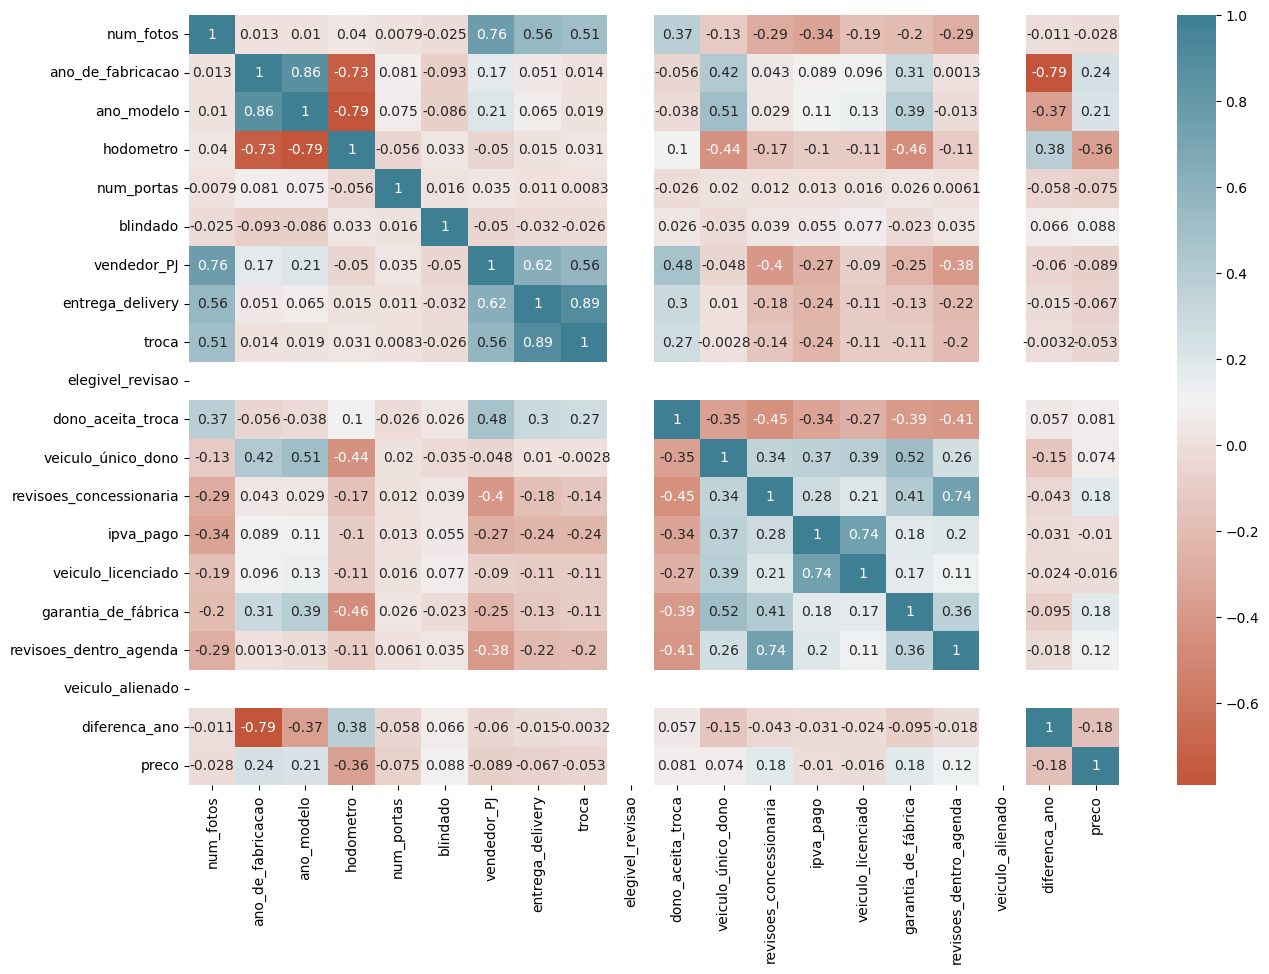

In [1027]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap=sns.diverging_palette(20, 220, n=200),)
plt.show()

As features, em geral, não apresentam fortes correlações com a variável preço. As que mais apresentaram algum tipo de correlação foram hodômetro (negativa) e ano de fabricação/modelo (positiva).

Algumas hipóteses de negócio:

* Vendedores PJ têm comportamentos diferentes de vendedores PF;
* A variável `ipva_pago` está relacionada com os estados, uma vez que o IPVA é um imposto com alíquotas diferentes por estado;
* O número de vendas está relacionado com a população do estado, e o ticket médio (valor médio da venda) com o PIB per capita.

### Hipótese 1: Vendedores PJ têm comportamentos diferentes de vendedores PF

Um comportamento que me chamou atenção foi com relação a variável `vendedor_PJ`. A seguir o mapa de calor das correlações da variável:

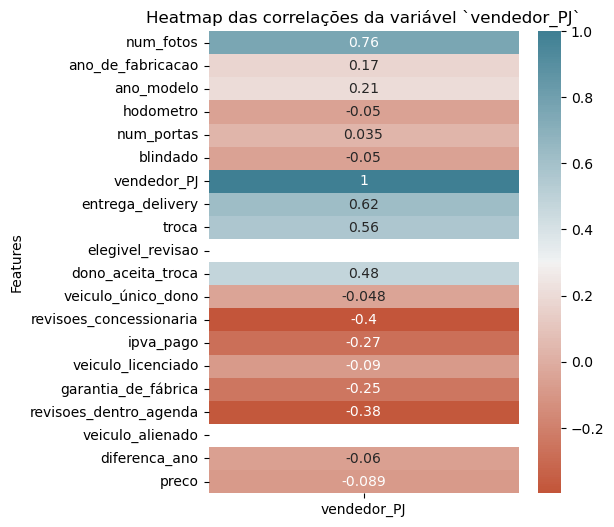

In [954]:
plt.figure(figsize=(5, 6))
sns.heatmap(df.corr(numeric_only=True).vendedor_PJ.to_frame(), annot=True, cmap=sns.diverging_palette(20, 220, n=200),)
plt.ylabel('Features')
plt.title('Heatmap das correlações da variável `vendedor_PJ`')
plt.show()

In [1000]:
print(f'Número de vendedores PF: {df.vendedor_PJ.value_counts()[False]} ({df.vendedor_PJ.value_counts()[False]/df.shape[0] * 100:.2f}%)')
print(f'Número de vendedores PJ: {df.vendedor_PJ.value_counts()[True]} ({df.vendedor_PJ.value_counts()[True]/df.shape[0] * 100:.2f}%)')


Número de vendedores PF: 17926 (60.59%)
Número de vendedores PJ: 11658 (39.41%)


In [1012]:
df.groupby('vendedor_PJ').entrega_delivery.value_counts(normalize=True)

vendedor_PJ  entrega_delivery
False        False               1.00000
True         True                0.51321
             False               0.48679
Name: entrega_delivery, dtype: float64

In [1011]:
df.groupby('vendedor_PJ').troca.value_counts(normalize=True)

vendedor_PJ  troca
False        False    1.000000
True         False    0.565878
             True     0.434122
Name: troca, dtype: float64

In [1010]:
df.groupby('vendedor_PJ').dono_aceita_troca.value_counts(normalize=True)

vendedor_PJ  dono_aceita_troca
False        True                 0.572576
             False                0.427424
True         True                 1.000000
Name: dono_aceita_troca, dtype: float64

Apenas vendedores PJ fazem delivery e tem veículos trocados anteriormente. Além disso, todos os vendedores PJ aceitam trocas.

In [990]:
df.groupby('vendedor_PJ').num_fotos.value_counts()

vendedor_PJ  num_fotos
False        8            17672
             16              65
             15              57
             0               38
             14              31
             17              19
             9               12
             20              12
             13               9
             18               7
             11               2
             12               1
             19               1
True         15            2707
             16            2162
             14            1780
             8             1748
             17             966
             9              716
             13             708
             20             274
             18             241
             12             146
             0              139
             19              44
             11              19
             21               5
             10               3
Name: num_fotos, dtype: int64

In [ ]:
print(f"Total de fotos quando o vendedor é PF: {df.groupby('vendedor_PJ').num_fotos.sum()[False]}")
print(f"Total de fotos quando o vendedor é PJ: {df.groupby('vendedor_PJ').num_fotos.sum()[True]}")

Total de fotos quando o vendedor é PF: 144672
Total de fotos quando o vendedor é PJ: 158921


Em geral vendedores PF anunciam com apenas 8 fotos, enquanto que vendedores PJ tendem a anunciar com mais fotos. 

In [1014]:
df.groupby('vendedor_PJ').ipva_pago.value_counts(normalize=True)

vendedor_PJ  ipva_pago
False        True         0.768493
             False        0.231507
True         True         0.504632
             False        0.495368
Name: ipva_pago, dtype: float64

Vendedores PF tendem a pagar o IPVA com mais frequência.

In [1009]:
df.groupby('vendedor_PJ').revisoes_concessionaria.value_counts(normalize=True)

vendedor_PJ  revisoes_concessionaria
False        False                      0.541671
             True                       0.458329
True         False                      0.917996
             True                       0.082004
Name: revisoes_concessionaria, dtype: float64

In [1016]:
df.groupby('vendedor_PJ').revisoes_dentro_agenda.value_counts(normalize=True)

vendedor_PJ  revisoes_dentro_agenda
False        False                     0.677675
             True                      0.322325
True         False                     0.988677
             True                      0.011323
Name: revisoes_dentro_agenda, dtype: float64

In [1017]:
df.groupby('vendedor_PJ').garantia_de_fábrica.value_counts(normalize=True)

vendedor_PJ  garantia_de_fábrica
False        False                  0.780989
             True                   0.219011
True         False                  0.962343
             True                   0.037657
Name: garantia_de_fábrica, dtype: float64

Vendedores PJ raramente fazem revisões na concessionária, estão com as revisões em dia e apresentam garantia de fábrica.

In [1025]:
df.groupby(['vendedor_PJ', 'veiculo_único_dono']).dono_aceita_troca.value_counts(normalize=True)

vendedor_PJ  veiculo_único_dono  dono_aceita_troca
False        False               True                 0.754610
                                 False                0.245390
             True                False                0.736383
                                 True                 0.263617
True         False               True                 1.000000
             True                True                 1.000000
Name: dono_aceita_troca, dtype: float64

Quando o vendedor é PF e é o único dono do veículo,  dificilmente aceita trocas. Em contrapartida, se o veículo teve mais de um dono, o dono geralmente aceita trocas.

### Hipótese 2: `ipva_pago` é menos frequente em estados com alíquotas maiores

Vamos carregar os valores das alíquotas do IPVA para cada estado. As informações foram obtidas [deste artigo](https://www.idinheiro.com.br/financaspessoais/tributos/guia-completo-ipva/).

In [1191]:
ipva_aliquotas = pd.read_excel('./dataset/aliquotas_ipva.xlsx', decimal=',')
ipva_aliquotas

,estado,aliquota
0,Acre (AC),0.0200
1,Alagoas (AL),0.0300
2,Amazonas (AM),0.0300
3,Bahia (BA),0.0250
4,Ceará (CE),0.0250
5,Espírito Santo (ES),0.0200
6,Goiás (GO),0.0375
7,Maranhão (MA),0.0250
8,Minas Gerais (MG),0.0400
9,Mato Grosso (MT),0.0300


Agora vamos comparar a contagem da variável `ipva_pago` com as respectivas alíquotas de cada estado.

In [1192]:
ipva_pago_estado = df.groupby('estado_vendedor')\
    .ipva_pago.value_counts(normalize=True)\
    .to_frame().rename(columns={'ipva_pago': 'frequencia'})\
    .reset_index()

ipva_pago_estado = ipva_pago_estado[ipva_pago_estado['ipva_pago'] == True].drop(columns=['ipva_pago'])

estado_ipva = ipva_pago_estado.merge(ipva_aliquotas, left_on='estado_vendedor', right_on='estado', how='left').drop(columns='estado')

estado_ipva

,estado_vendedor,frequencia,aliquota
0,Acre (AC),0.310345,0.0200
1,Alagoas (AL),1.000000,0.0300
2,Amazonas (AM),0.490196,0.0300
3,Bahia (BA),0.317881,0.0250
4,Ceará (CE),0.826087,0.0250
5,Espírito Santo (ES),0.714286,0.0200
6,Goiás (GO),0.798479,0.0375
7,Maranhão (MA),1.000000,0.0250
8,Mato Grosso (MT),0.939394,0.0300
9,Mato Grosso do Sul (MS),0.914286,0.0300


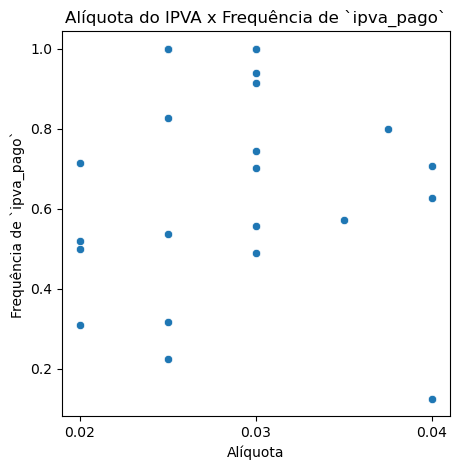

In [1193]:
plt.figure(figsize=(5, 5))
sns.scatterplot(estado_ipva, x='aliquota', y='frequencia')
plt.xticks(np.arange(.02, .041, .01))
plt.xlabel('Alíquota')
plt.ylabel('Frequência de `ipva_pago`')
plt.title('Alíquota do IPVA x Frequência de `ipva_pago`')
plt.show()

In [1194]:
estado_ipva.corr(numeric_only=True)

,frequencia,aliquota
frequencia,1.000000,0.007877
aliquota,0.007877,1.000000


Não há uma correlação entre a frequência de pagamento do IPVA com a alíquota de cada estado.

### Hipótese 3: O número de vendas é maior a medida que o estado for mais populoso e o ticket médio é maior a medida que o PIB per capita cresce

Para essa hipótese, vamos agrupar os dados por estado e comparar com a população e o PIB per capita de cada estado.

[Fonte](https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o) para os dados da população (vide censo 2022).

[Fonte](https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_PIB_per_capita) para os dados do PIB per capita (referente ao ano 2020).

In [1206]:
populacao_pib = pd.read_excel('./dataset/populacao_pib.xlsx')
populacao_pib

,estado,populacao,pib_per_capita
0,Acre (AC),830026,18420.26
1,Alagoas (AL),3127511,18857.69
2,Amazonas (AM),3941175,27572.96
3,Bahia (BA),14136417,20449.29
4,Ceará (CE),8791688,18168.35
5,Espírito Santo (ES),3833486,34065.98
6,Goiás (GO),7055228,31506.97
7,Maranhão (MA),6775152,15027.69
8,Mato Grosso (MT),3658813,50663.19
9,Mato Grosso do Sul (MS),2756700,43649.17


In [1215]:
estados_vendas = df.groupby('estado_vendedor').agg({'preco': ['count', 'mean']}).preco.reset_index()

estados_vendas = estados_vendas \
    .merge(populacao_pib, left_on='estado_vendedor', right_on='estado', how='left') \
    .drop(columns='estado').rename(columns={'count': 'numero_vendas', 'mean': 'ticket_medio'})

estados_vendas

,estado_vendedor,numero_vendas,ticket_medio,populacao,pib_per_capita
0,Acre (AC),29,93106.525083,830026,18420.26
1,Alagoas (AL),125,129906.553416,3127511,18857.69
2,Amazonas (AM),51,85051.223887,3941175,27572.96
3,Bahia (BA),604,129285.733262,14136417,20449.29
4,Ceará (CE),69,102755.663320,8791688,18168.35
5,Espírito Santo (ES),21,96534.373882,3833486,34065.98
6,Goiás (GO),789,153416.087865,7055228,31506.97
7,Maranhão (MA),7,121041.689127,6775152,15027.69
8,Mato Grosso (MT),33,143297.450639,3658813,50663.19
9,Mato Grosso do Sul (MS),35,113270.313388,2756700,43649.17


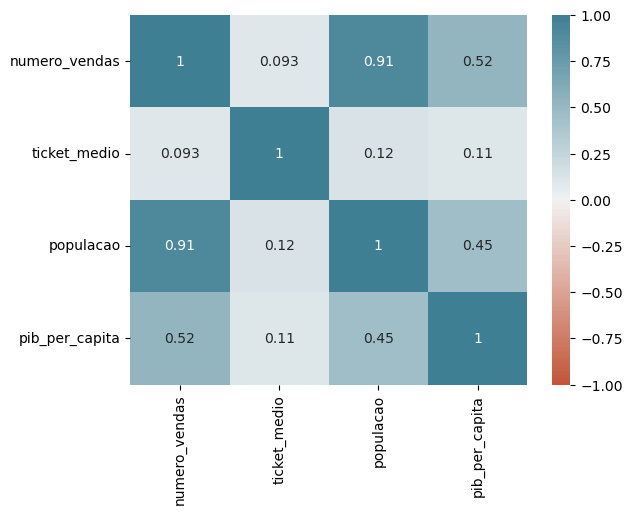

In [1222]:
sns.heatmap(estados_vendas.corr(numeric_only=True), annot=True, cmap=sns.diverging_palette(20, 220, n=200), vmin=-1)
plt.show()

Pelo gráfico acima, o número de vendas está fortemente (e positivamente) correlacionado com a população do estado, enquanto que o ticket médio apresenta correlação positiva mais fraca, tanto para população quanto para o PIB per capita.